In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
sns.set_style("whitegrid")

import os,sys
import pickle
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore'
                       )
os.getcwd()

import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po
from plotly.subplots import make_subplots


In [2]:
import scipy
import datetime
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier,Pool,cv 
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc,f1_score,RocCurveDisplay

from scipy.stats import chi2_contingency,pointbiserialr
from scipy.stats.contingency import association


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
data=pd.read_csv('Data.csv')

In [5]:
data.head()

destination  passanger weather  temperature                 coupon expiration  gender age      maritalStatus  has_children                 education  occupation           income  car    Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Accept(Y/N?)
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)         1d  Female  21  Unmarried partner             1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never       never       NaN                  4~8              1~3                 1                  0                  0               0              1             1
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h  Female  21  Unmarried partner             1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never       never       NaN                  4~8              1~3                 1                  0                  0               0              1             0
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away         2h  Female  21  Unmarried partner             1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never       never       NaN                  4~8              1~3                 1                  1                  0               0              1             1
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h  Female  21  Unmarried partner             1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never       never       NaN                  4~8              1~3                 1                  1                  0               0              1             0
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House         1d  Female  21  Unmarried partner             1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never       never       NaN                  4~8              1~3                 1                  1                  0               0              1             0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [7]:
#Observation:
# we we have total 12684 rows and 25 columns 
# out of 25, we have 8 are numeric and 17 are categorical

In [8]:
data=data.rename(columns = { 'Accept(Y/N?)' : 'target'})

In [9]:
cols=data.columns
cols


Index(['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'target'], dtype='object')

In [10]:
for col in cols:
    print( col, data[col].unique() )

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
temperature [55 80 30]
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children [1 0]
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Con

## Preprocessing & EDA

#handling missing data
#handling outliers - As this is classification model, outlier treatment is not require
#feature scaling - not required
#encoding - convert text to numbers required 
#handling imbalance 

In [11]:
# Remove duplicates
duplicate = data[data.duplicated(keep = 'last')]
# duplicate.shape #(74, 26)
data = data.drop_duplicates()
data.shape

(12393, 25)

In [12]:
# Handling missing data


In [13]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12287
Bar                       106
CoffeeHouse               215
CarryAway                 148
RestaurantLessThan20      128
Restaurant20To50          188
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
target                      0
dtype: int64

In [14]:
data.isnull().sum()/len(data)*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.144678
Bar                      0.855322
CoffeeHouse              1.734850
CarryAway                1.194223
RestaurantLessThan20     1.032841
Restaurant20To50         1.516985
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
target                   0.000000
dtype: float64

In [15]:
# missing values
print('Is there any missing value present or not?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


missing_count  missing_percentage
car                           12287           99.144678
Bar                             106            0.855322
CoffeeHouse                     215            1.734850
CarryAway                       148            1.194223
RestaurantLessThan20            128            1.032841
Restaurant20To50                188            1.516985

In [16]:
#Observation:
#Car has 99% data missing hence we are going to drop the variable.
#We will use mode imputation the remaining null values in variables #car,CoffeeHouse,CarryAway,
#RestaurantLessThan20,Restaurant20To50         

In [17]:
data=data.drop(['car'], axis=1)

In [18]:
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])


In [19]:
data.shape

(12393, 24)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null

In [21]:
# Now we have hanndled all the missing data

In [22]:
# lets check the numerical colmuns distribution
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp        target
count  12393.000000  12393.000000           12393.0       12393.000000       12393.000000    12393.000000   12393.000000  12393.000000
mean      63.252643      0.415557               1.0           0.563625           0.118051        0.213750       0.786250      0.565803
std       19.075396      0.492838               0.0           0.495955           0.322681        0.409969       0.409969      0.495671
min       30.000000      0.000000               1.0           0.000000           0.000000        0.000000       0.000000      0.000000
25%       55.000000      0.000000               1.0           0.000000           0.000000        0.000000       1.000000      0.000000
50%       80.000000      0.000000               1.0           1.000000           0.000000        0.000000       1.000000      1.000000
75%       80.000000      1.000000               1.0           1.000000           0.000000        0.000000       1.000000      1.000000
max       80.000000      1.000000               1.0           1.000000           1.000000        1.000000       1.000000      1.000000

In [23]:
numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns
numeric_cols

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  target
0               55             1                 1                  0                  0               0              1       1
1               80             1                 1                  0                  0               0              1       0
2               80             1                 1                  1                  0               0              1       1
3               80             1                 1                  1                  0               0              1       0
4               80             1                 1                  1                  0               0              1       0
...            ...           ...               ...                ...                ...             ...            ...     ...
12679           55             0                 1                  0                  0               1              0       1
12680           55             0                 1                  0                  0               0              1       1
12681           30             0                 1                  0                  0               1              0       0
12682           30             0                 1                  1                  1               0              1       0
12683           80             0                 1                  0                  0               1              0       0

[12393 rows x 8 columns]

In [24]:
numeric_cols.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
target               2
dtype: int64

In [25]:
#Observation

# the column toCoupon_GEQ5min shows single value and no varience. Hence its not significant.
# we will drop the toCoupon_GEQ5min column
data.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)

In [26]:
numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns
numeric_cols

temperature  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  target
0               55             1                  0                  0               0              1       1
1               80             1                  0                  0               0              1       0
2               80             1                  1                  0               0              1       1
3               80             1                  1                  0               0              1       0
4               80             1                  1                  0               0              1       0
...            ...           ...                ...                ...             ...            ...     ...
12679           55             0                  0                  0               1              0       1
12680           55             0                  0                  0               0              1       1
12681           30             0                  0                  0               1              0       0
12682           30             0                  1                  1               0              1       0
12683           80             0                  0                  0               1              0       0

[12393 rows x 7 columns]

In [27]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'target'], dtype='object')

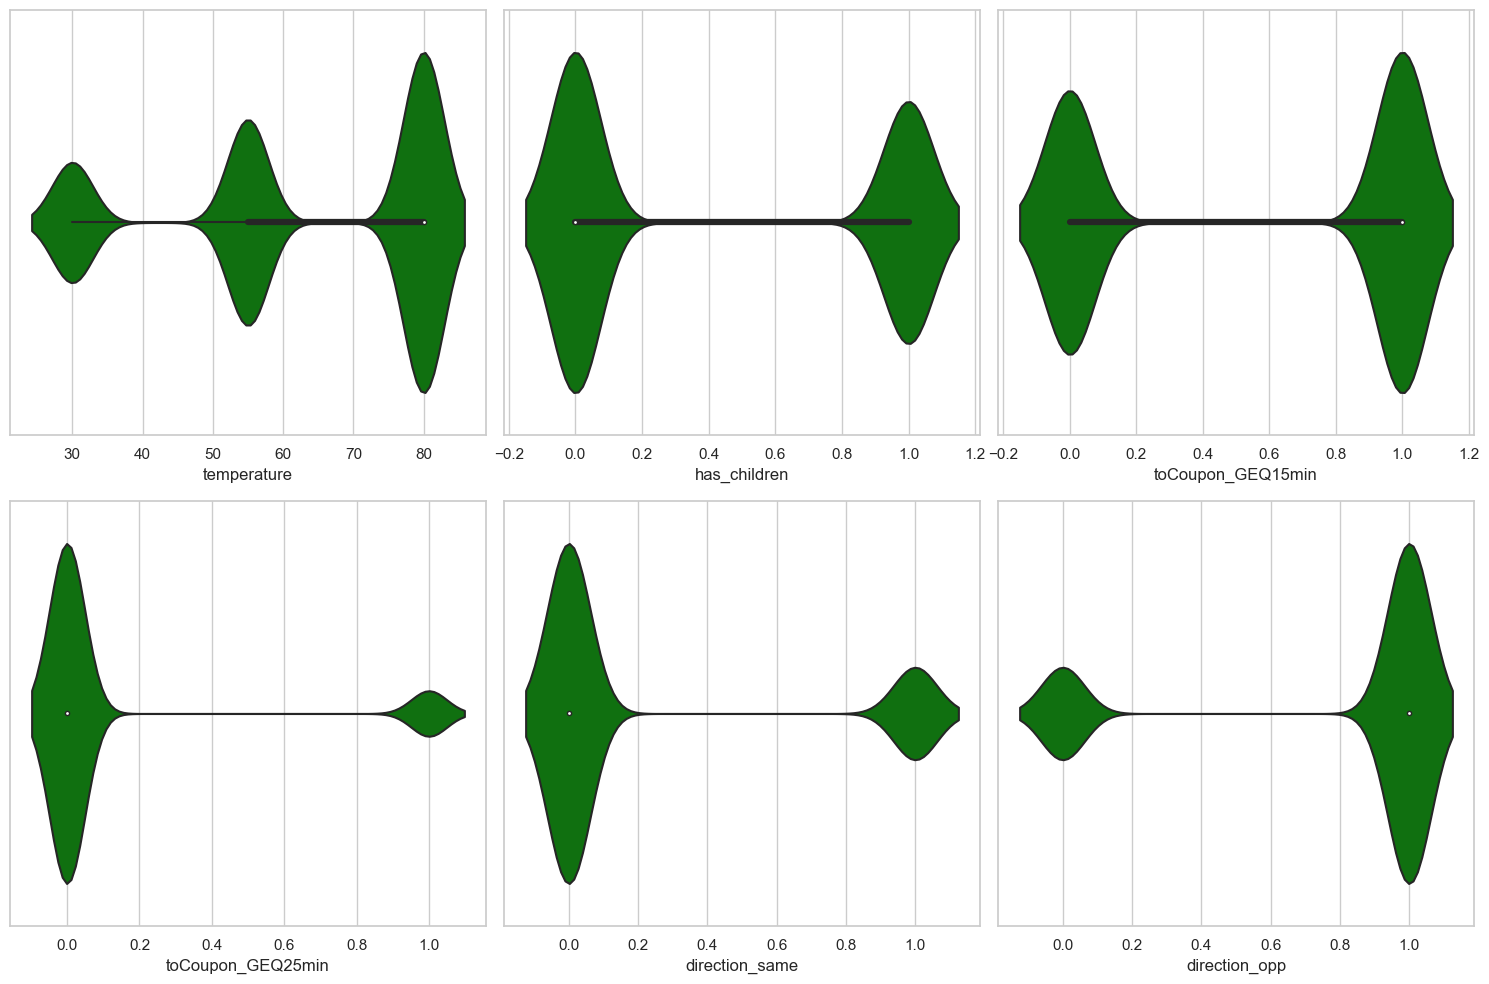

In [28]:
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten()  
for col, ax in zip(numeric_cols, axes):
    sns.violinplot(data=data, x= data[col],  ax=ax,color='green', hue='target')
   # sns.swarmplot(data=dataset, x= dataset[col],  ax=g)
fig.tight_layout()
plt.show()

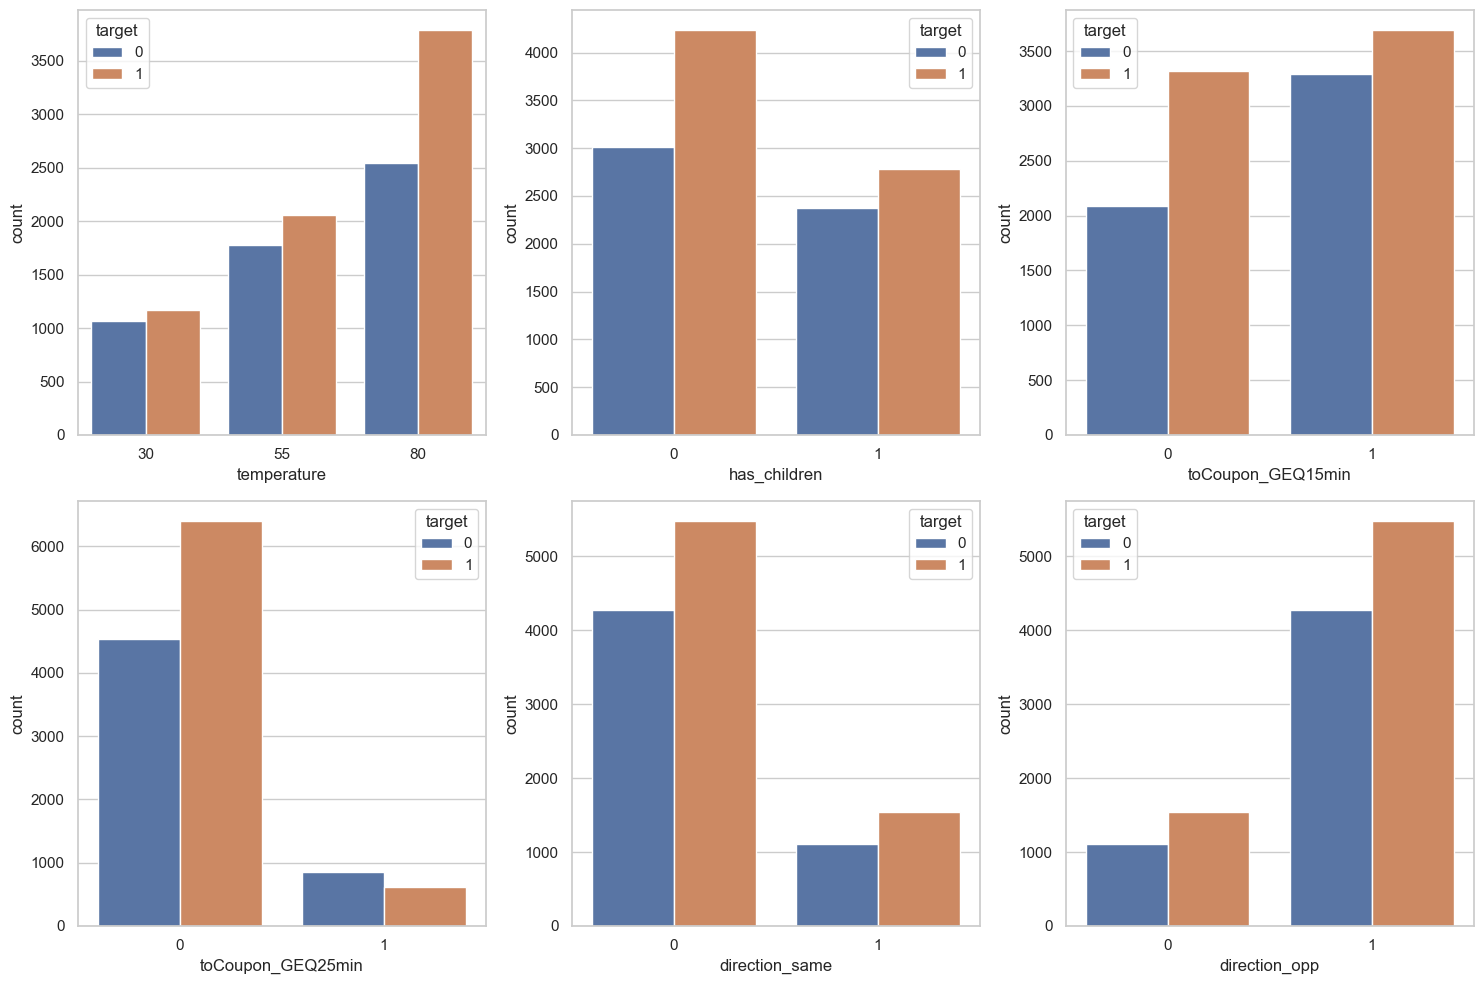

In [29]:
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten()  
for col, ax in zip(numeric_cols, axes):
    sns.countplot(data=data, x= data[col],  ax=ax, hue='target')
   # sns.swarmplot(data=dataset, x= dataset[col],  ax=g)
fig.tight_layout()
plt.show()

In [30]:
#As we can the numeric columns are also categories
cat_cols = data.select_dtypes(include = np.object) ### selects numeric columns
cat_cols

destination  passanger weather                 coupon expiration  gender age      maritalStatus                 education       occupation           income    Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
0      No Urgent Place      Alone   Sunny        Restaurant(<20)         1d  Female  21  Unmarried partner  Some college - no degree       Unemployed  $37500 - $49999  never       never       1~3                  4~8              1~3
1      No Urgent Place  Friend(s)   Sunny           Coffee House         2h  Female  21  Unmarried partner  Some college - no degree       Unemployed  $37500 - $49999  never       never       1~3                  4~8              1~3
2      No Urgent Place  Friend(s)   Sunny  Carry out & Take away         2h  Female  21  Unmarried partner  Some college - no degree       Unemployed  $37500 - $49999  never       never       1~3                  4~8              1~3
3      No Urgent Place  Friend(s)   Sunny           Coffee House         2h  Female  21  Unmarried partner  Some college - no degree       Unemployed  $37500 - $49999  never       never       1~3                  4~8              1~3
4      No Urgent Place  Friend(s)   Sunny           Coffee House         1d  Female  21  Unmarried partner  Some college - no degree       Unemployed  $37500 - $49999  never       never       1~3                  4~8              1~3
...                ...        ...     ...                    ...        ...     ...  ..                ...                       ...              ...              ...    ...         ...       ...                  ...              ...
12679             Home    Partner   Rainy  Carry out & Take away         1d    Male  26             Single          Bachelors degree  Sales & Related  $75000 - $87499  never       never       1~3                  4~8              1~3
12680             Work      Alone   Rainy  Carry out & Take away         1d    Male  26             Single          Bachelors degree  Sales & Related  $75000 - $87499  never       never       1~3                  4~8              1~3
12681             Work      Alone   Snowy           Coffee House         1d    Male  26             Single          Bachelors degree  Sales & Related  $75000 - $87499  never       never       1~3                  4~8              1~3
12682             Work      Alone   Snowy                    Bar         1d    Male  26             Single          Bachelors degree  Sales & Related  $75000 - $87499  never       never       1~3                  4~8              1~3
12683             Work      Alone   Sunny      Restaurant(20-50)         2h    Male  26             Single          Bachelors degree  Sales & Related  $75000 - $87499  never       never       1~3                  4~8              1~3

[12393 rows x 16 columns]

# Correlation Analysis

In [31]:
summary_table = PrettyTable(["Column", "Correlated?", "P-val"]) #heading

def check_correlation(df,column,target_col):
    contigency = pd.crosstab(df[col],df[target_col])
    res = chi2_contingency(contigency)
    res_corr='Correlated 'if res[1] < 0.05  else 'Not Correlated'
    p_val=res[1]
    return column,target_col, res_corr,p_val
 
for col in data.columns:
    column,target_col, res_corr,p_val= check_correlation(data,col,'target')
    summary_table.add_row([column, res_corr,p_val])

table = pd.read_html(summary_table.get_html_string())
corr = table[0]
corr
                          

Column     Correlated?          P-val
0            destination      Correlated   3.315606e-47
1              passanger      Correlated   1.014467e-46
2                weather      Correlated   9.095776e-33
3            temperature      Correlated   5.157511e-13
4                 coupon      Correlated  8.078114e-184
5             expiration      Correlated   3.206949e-46
6                 gender      Correlated   9.515823e-07
7                    age      Correlated   4.526756e-11
8          maritalStatus      Correlated   8.673752e-10
9           has_children      Correlated   6.397502e-07
10             education      Correlated   4.652514e-08
11            occupation      Correlated   1.488529e-14
12                income      Correlated   1.002798e-07
13                   Bar      Correlated   4.324369e-16
14           CoffeeHouse      Correlated   9.861456e-59
15             CarryAway      Correlated   1.561884e-08
16  RestaurantLessThan20      Correlated   1.341747e-04
17      Restaurant20To50      Correlated   4.906857e-14
18     toCoupon_GEQ15min      Correlated   1.165086e-21
19     toCoupon_GEQ25min      Correlated   4.594027e-33
20        direction_same  Not Correlated   7.206560e-02
21         direction_opp  Not Correlated   7.206560e-02
22                target      Correlated   0.000000e+00

In [32]:
# Observation
# from the chi2 correlation , we can see that  direction_same,direction_opp are not 
#correlated with Target veriable so lets drop them

data.drop(['direction_opp','direction_same'], axis=1, inplace=True)

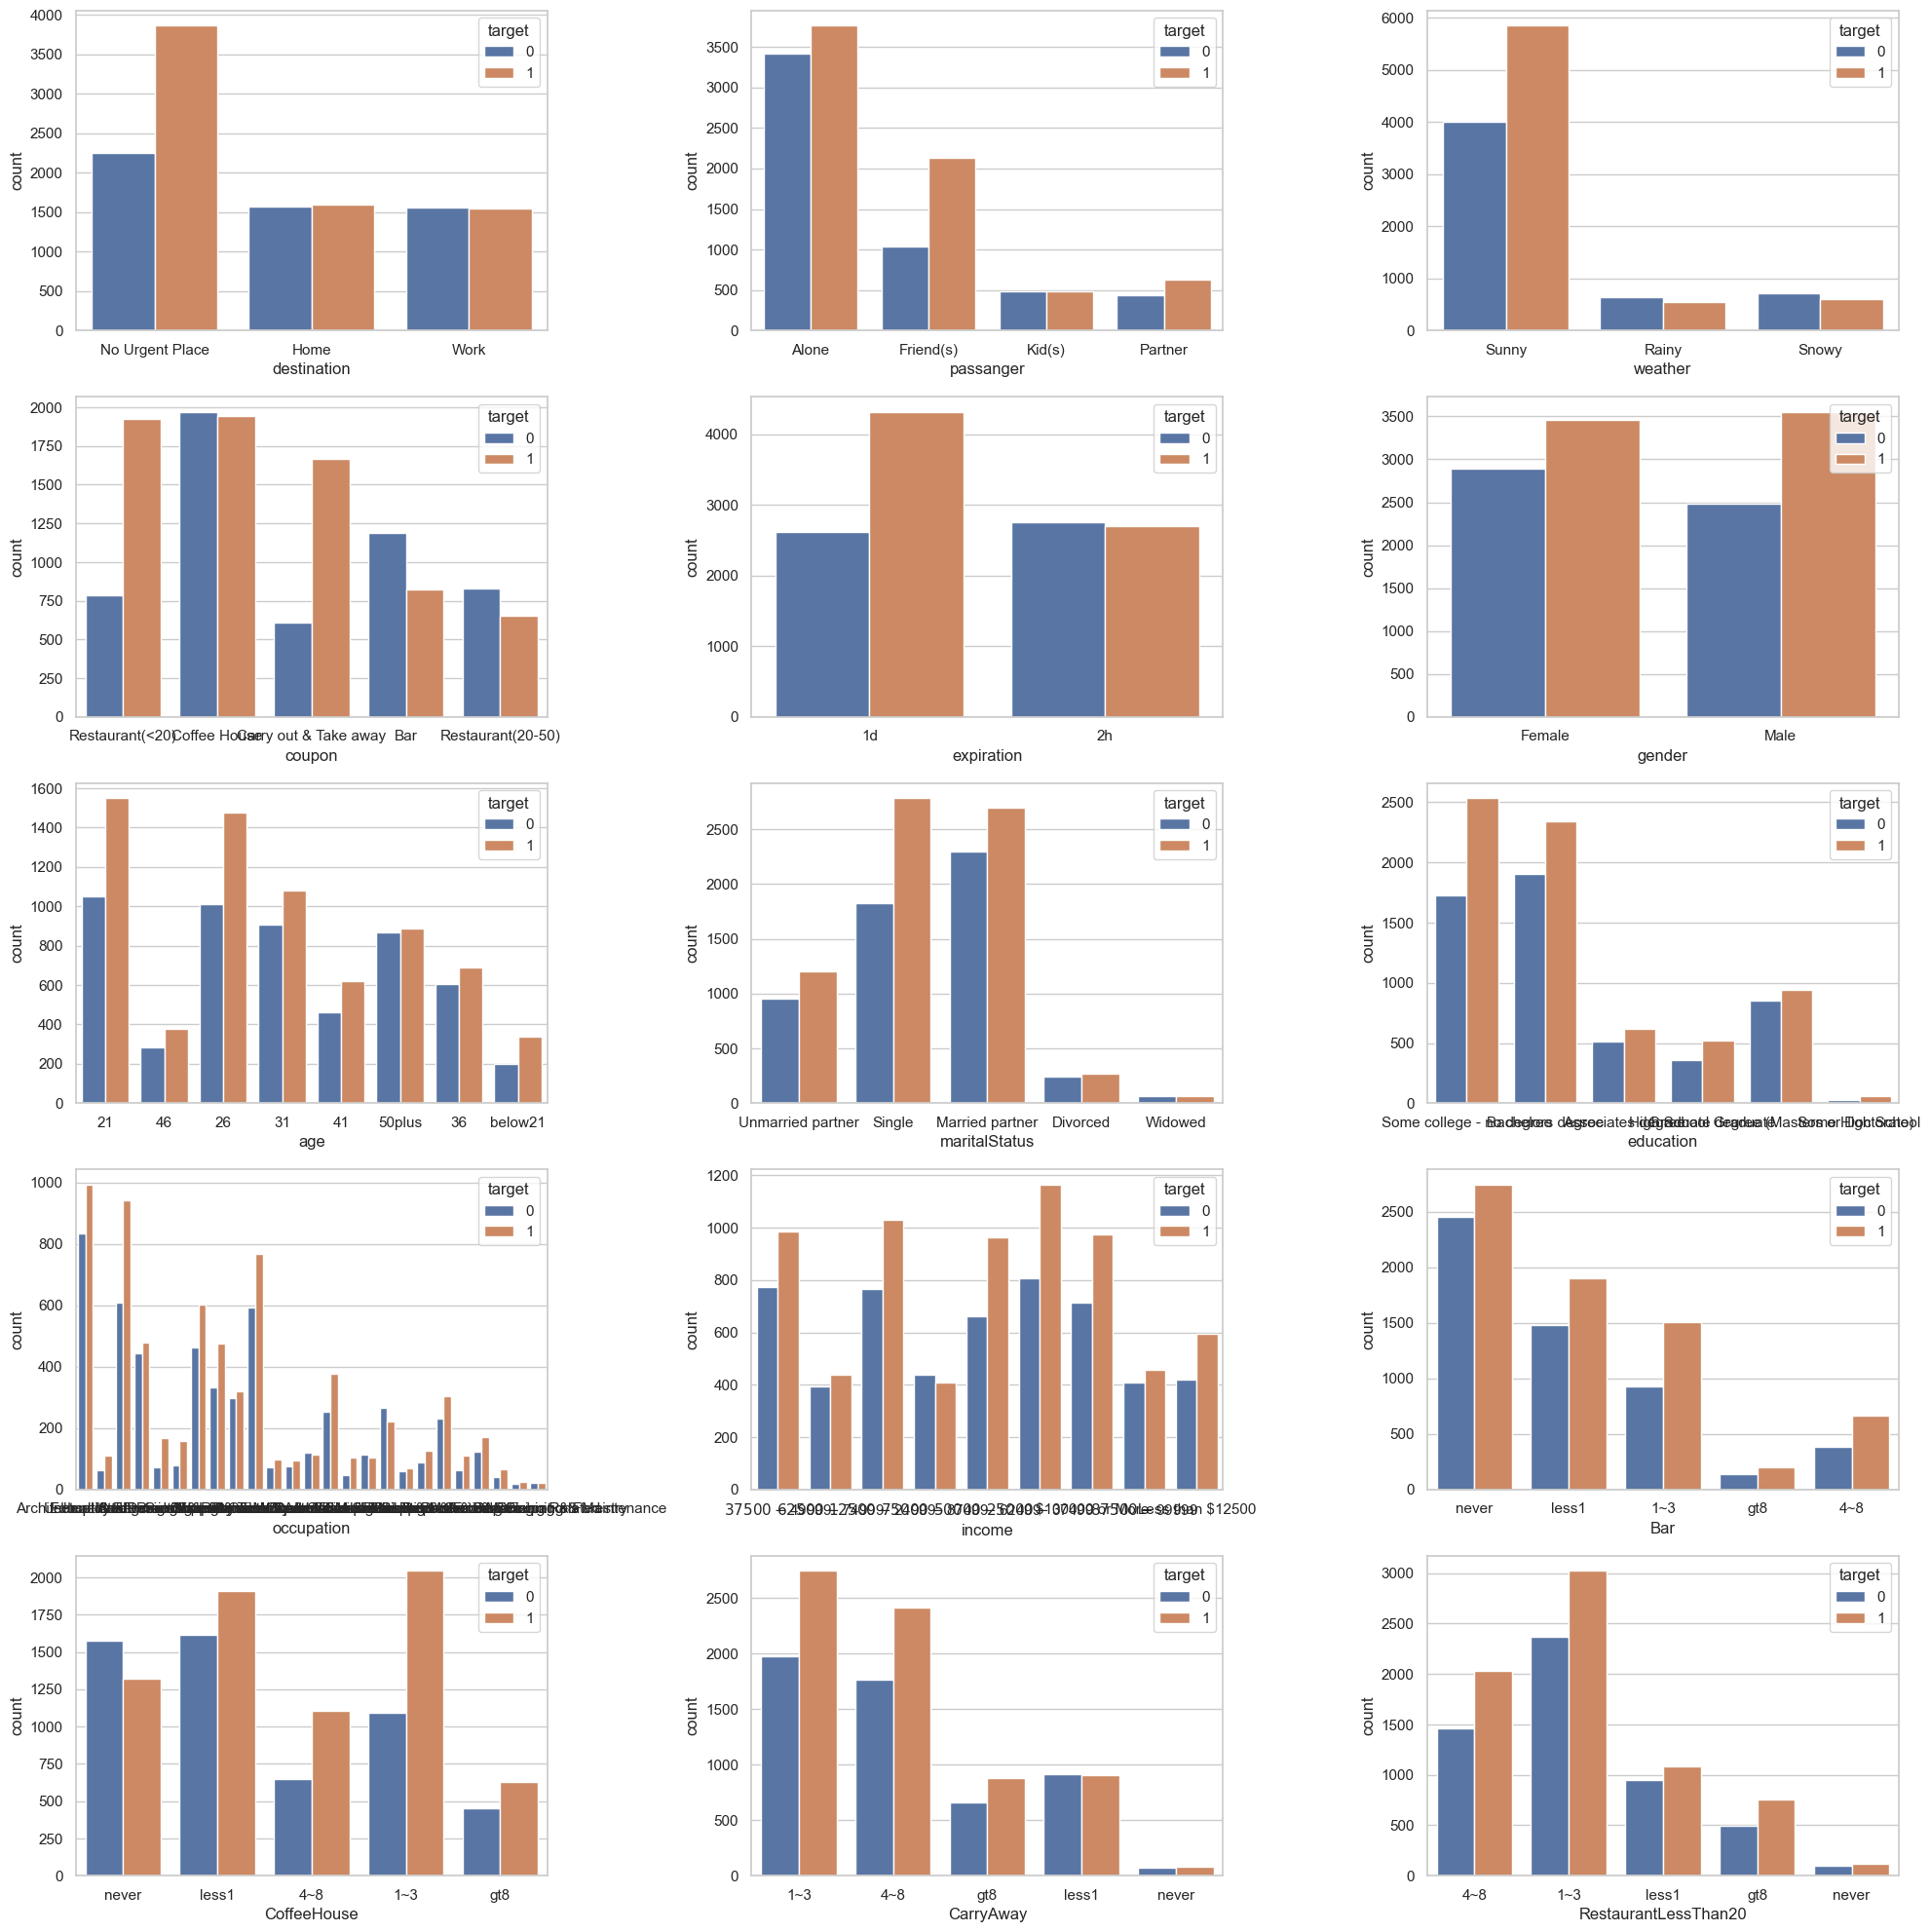

In [33]:

# create the figure and axes
fig, axes = plt.subplots(5, 3 , figsize=(20,20))
axes = axes.flatten()  # flattening the array makes indexing easier

for col, ax in zip(cat_cols, axes):
    sns.countplot(data=data, x= data[col],  ax=ax ,  hue='target')
   # sns.swarmplot(data=dataset, x= dataset[col],  ax=g)


fig.tight_layout()
plt.show()


In [34]:
def univariate_analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name).target.count())
    df_EDA['Accepted'] = list(data[data.target==1].groupby(column_name).target.count())
    df_EDA['Rejected'] = list(data[data.target==0].groupby(column_name).target.count())
    df_EDA['%Accepted'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%Rejected'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    #fig = plt.subplots(figsize =(8, 4))
    fig = go.Figure()
    fig.add_trace(go.Bar( y=df_EDA[column_name], x=df_EDA['Total_Count'], name='Total_Count',
                         orientation='h',text= df_EDA['Total_Count'], textposition='auto'))
    fig.add_trace(go.Bar(y=df_EDA[column_name], x=df_EDA['Accepted'], name='Accepted',
                         orientation='h',text= df_EDA['Accepted'], textposition='auto'))
    fig.update_layout(barmode='overlay')
    fig.show()

    #plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    #plt.barh(df_EDA[column_name],df_EDA['Accepted'])
 

    return df_EDA

In [35]:
univariate_analysis('destination')

destination  Total_Count  Accepted  Rejected  %Accepted  %Rejected
1  No Urgent Place         6118      3865      2253     63.174     36.826
0             Home         3161      1594      1567     50.427     49.573
2             Work         3114      1553      1561     49.872     50.128

__Observations:__

* Most of the users go to No Urgent Place.
* The users who have destination No Urgent Place are accepting more coupons than others.
* The users who have destination Home and Work have almost similar coupon acceptance ratios.

In [36]:
univariate_analysis('passanger')

passanger  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0      Alone         7178      3760      3418     52.382     47.618
1  Friend(s)         3166      2127      1039     67.183     32.817
3    Partner         1068       634       434     59.363     40.637
2     Kid(s)          981       491       490     50.051     49.949

__Observations:__
* Most of the time users go out Alone.
* The users who go out with Friends are accepting more coupons than other co-passengers.
* The users who go out with Friends or Partner have more coupon acceptance ratios than Alone users.

In [37]:
univariate_analysis('weather')

weather  Total_Count  Accepted  Rejected  %Accepted  %Rejected
2   Sunny         9862      5850      4012     59.319     40.681
1   Snowy         1329       605       724     45.523     54.477
0   Rainy         1202       557       645     46.339     53.661

__Observations:__
* In Sunny weather, users go out more and accept more coupons than other wethers.

In [38]:
univariate_analysis('temperature')

temperature  Total_Count  Accepted  Rejected  %Accepted  %Rejected
2           80         6328      3786      2542     59.829     40.171
1           55         3828      2055      1773     53.683     46.317
0           30         2237      1171      1066     52.347     47.653

__Observations:__
* Most of the time users go out when the temperature is 80 F.
* When the temperature is 80 F, user's coupon acceptance ratio is approx 59.86%.

In [39]:
univariate_analysis('coupon')

coupon  Total_Count  Accepted  Rejected  %Accepted  %Rejected
2           Coffee House         3913      1943      1970     49.655     50.345
4        Restaurant(<20)         2708      1924       784     71.049     28.951
1  Carry out & Take away         2275      1665       610     73.187     26.813
0                    Bar         2010       824      1186     40.995     59.005
3      Restaurant(20-50)         1487       656       831     44.116     55.884

__Observations:__
* Maximum coupons offered are for Coffee House coupons.
* Maximum coupons accepted by users are Carry out & Take away and Restaurant(<20) coupons.
* Bar coupon has a very low acceptance ratio.

In [40]:
univariate_analysis('expiration')

expiration  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0         1d         6938      4317      2621     62.223     37.777
1         2h         5455      2695      2760     49.404     50.596

__Observations:__
* Maximum coupons are one-day expiration coupons
* Most of the users accept one-day expiration coupons.
* Two hours expiration coupons have a 50% acceptance ratio.

In [41]:
univariate_analysis('gender')

gender  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0  Female         6355      3460      2895     54.445     45.555
1    Male         6038      3552      2486     58.827     41.173

__Observations:__
* Male and Female both have almost similar coupon acceptance ratios.

In [42]:
univariate_analysis('age')

age  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0       21         2598      1549      1049     59.623     40.377
1       26         2486      1475      1011     59.332     40.668
2       31         1984      1079       905     54.385     45.615
6   50plus         1756       888       868     50.569     49.431
3       36         1293       687       606     53.132     46.868
4       41         1079       618       461     57.275     42.725
5       46          660       378       282     57.273     42.727
7  below21          537       338       199     62.942     37.058

__Observations:__
    * Most users in this data have ages between 21 to 26 years.
    * The users whose age is below 21 years have the highest coupon acceptance ratio.
    * The users whose age is above 50 years have the highest coupon rejection ratio.

<Axes: xlabel='age', ylabel='count'>

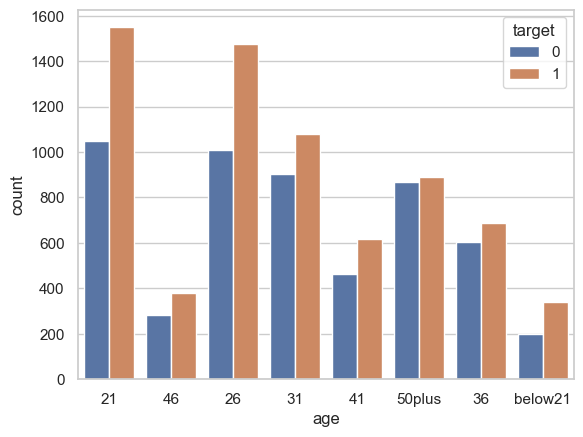

In [43]:
sns.countplot(data=data, x= data['age'],   hue='target')

In [44]:
univariate_analysis('maritalStatus')

maritalStatus  Total_Count  Accepted  Rejected  %Accepted  %Rejected
1    Married partner         4994      2697      2297     54.005     45.995
2             Single         4610      2784      1826     60.390     39.610
3  Unmarried partner         2155      1203       952     55.824     44.176
0           Divorced          505       266       239     52.673     47.327
4            Widowed          129        62        67     48.062     51.938

__Observations:__
* Most users in this data are Single or have Married partner.
* Single users accept more coupons than others.
* Users who have Unmarried partner accept more coupons than Married partner users.

In [45]:
univariate_analysis('has_children')

has_children  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0             0         7243      4234      3009     58.456     41.544
1             1         5150      2778      2372     53.942     46.058

__Observations:__
* Users who have no children have a slightly higher acceptance ratio than the users who have children.

In [46]:
univariate_analysis('education')

education  Total_Count  Accepted  Rejected  %Accepted  %Rejected
5                Some college - no degree         4260      2534      1726     59.484     40.516
1                        Bachelors degree         4247      2344      1903     55.192     44.808
2  Graduate degree (Masters or Doctorate)         1793       939       854     52.370     47.630
0                       Associates degree         1126       614       512     54.529     45.471
3                    High School Graduate          880       519       361     58.977     41.023
4                        Some High School           87        62        25     71.264     28.736

__Observations:__
* Most users have at least a Bachelor's degree or Some college - no degree.
* In this data, very few users have only Some High School education, and those users have the highest coupon acceptance ratio.
* Users who have a Graduate degree (Masters or Doctorate) have the least coupon acceptance ratio. 

In [47]:
univariate_analysis('occupation')

occupation  Total_Count  Accepted  Rejected  %Accepted  %Rejected
24                                 Unemployed         1828       993       835     54.322     45.678
22                                    Student         1550       941       609     60.710     39.290
5                     Computer & Mathematical         1360       768       592     56.471     43.529
21                            Sales & Related         1066       602       464     56.473     43.527
7                  Education&Training&Library          921       477       444     51.792     48.208
15                                 Management          806       474       332     58.809     41.191
16            Office & Administrative Support          631       377       254     59.746     40.254
1    Arts Design Entertainment Sports & Media          617       319       298     51.702     48.298
3                        Business & Financial          536       305       231     56.903     43.097
20                                    Retired          489       222       267     45.399     54.601
9          Food Preparation & Serving Related          293       170       123     58.020     41.980
10       Healthcare Practitioners & Technical          237       158        79     66.667     33.333
11                         Healthcare Support          237       166        71     70.042     29.958
4                 Community & Social Services          236       115       121     48.729     51.271
13                                      Legal          218       103       115     47.248     52.752
23           Transportation & Material Moving          214       126        88     58.879     41.121
19                         Protective Service          172       110        62     63.953     36.047
0                  Architecture & Engineering          172       110        62     63.953     36.047
17                    Personal Care & Service          172        95        77     55.233     44.767
14               Life Physical Social Science          168        97        71     57.738     42.262
6                   Construction & Extraction          150       103        47     68.667     31.333
12          Installation Maintenance & Repair          129        69        60     53.488     46.512
18                     Production Occupations          108        67        41     62.037     37.963
2   Building & Grounds Cleaning & Maintenance           42        24        18     57.143     42.857
8                  Farming Fishing & Forestry           41        21        20     51.220     48.780

__Observations:__
* Most users in this data are Unemployed and Student.
* Users who are students have more coupon acceptance ratio than Unemployed users. 
* Users who have occupation Healthcare Support and Construction & Extraction accept more coupons than others.

<Axes: xlabel='occupation', ylabel='count'>

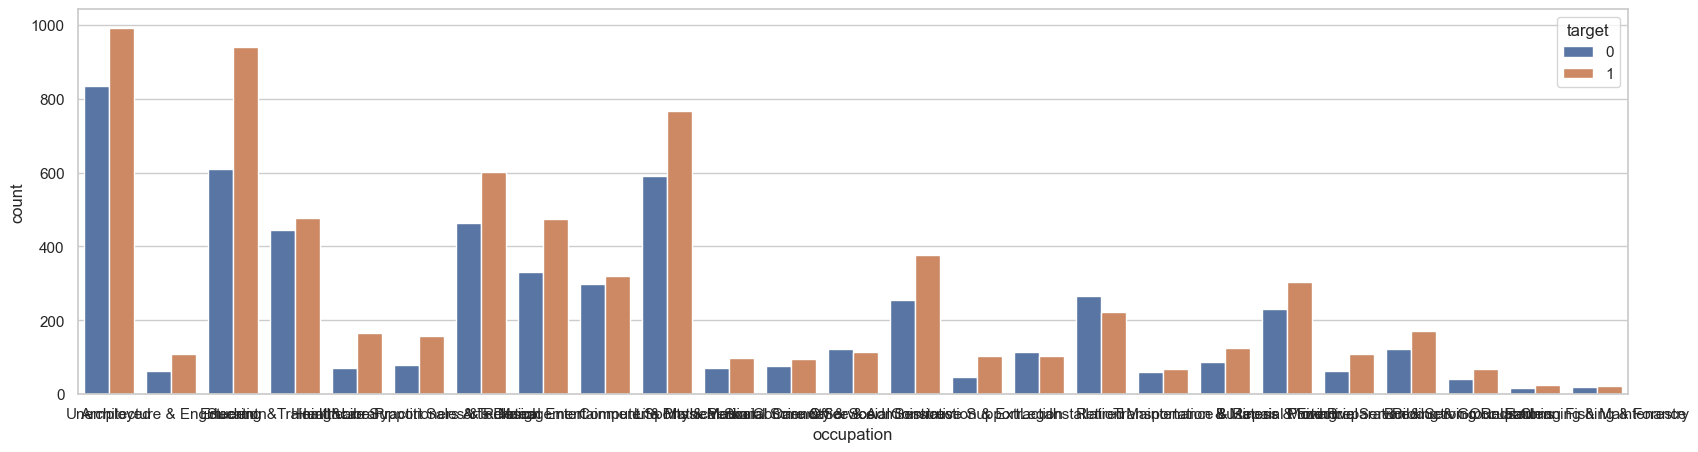

In [48]:
fig=plt.figure(figsize=(20,5))
sns.countplot(data=data, x= data['occupation'],   hue='target')

In [49]:
univariate_analysis('income')

income  Total_Count  Accepted  Rejected  %Accepted  %Rejected
2   $25000 - $37499         1972      1165       807     59.077     40.923
1   $12500 - $24999         1795      1029       766     57.326     42.674
3   $37500 - $49999         1760       987       773     56.080     43.920
0   $100000 or More         1688       974       714     57.701     42.299
4   $50000 - $62499         1624       964       660     59.360     40.640
8  Less than $12500         1013       593       420     58.539     41.461
7   $87500 - $99999          865       456       409     52.717     47.283
6   $75000 - $87499          844       407       437     48.223     51.777
5   $62500 - $74999          832       437       395     52.524     47.476

__Observations:__
* Most users in this data have income in between 12500\$ to 49999\$
* Users who have low income and high income accept more coupons than others.
* Users who have medium-range income are mostly rejecting the coupon.

In [50]:
univariate_analysis('CarryAway')

CarryAway  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0       1~3         4719      2743      1976     58.127     41.873
1       4~8         4171      2409      1762     57.756     42.244
3     less1         1819       906       913     49.808     50.192
2       gt8         1535       876       659     57.068     42.932
4     never          149        78        71     52.349     47.651

__Observations:__
* Most users in this data have visited 1 to 8 times Carry Away services.
* Users who visited Carry Away services greater than 1 time have the highest coupon acceptance ratio is approx 58%.

In [51]:
univariate_analysis('RestaurantLessThan20')

RestaurantLessThan20  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0                  1~3         5397      3024      2373     56.031     43.969
1                  4~8         3493      2032      1461     58.173     41.827
3                less1         2034      1082       952     53.196     46.804
2                  gt8         1253       759       494     60.575     39.425
4                never          216       115       101     53.241     46.759

In [52]:
univariate_analysis('Restaurant20To50')

Restaurant20To50  Total_Count  Accepted  Rejected  %Accepted  %Rejected
3            less1         6134      3407      2727     55.543     44.457
0              1~3         3204      1895      1309     59.145     40.855
4            never         2083      1070      1013     51.368     48.632
1              4~8          718       470       248     65.460     34.540
2              gt8          254       170        84     66.929     33.071

__Observations:__
* Restaurant20To50 is an expensive Restaurant where the average bill for one person is between 20\$ to 50\$.
* Most users visited an expensive Restaurant only one time.
* Users who visited an expensive Restaurant greater than 4 times have the highest coupon acceptance ratio.

In [53]:
univariate_analysis('CoffeeHouse')

CoffeeHouse  Total_Count  Accepted  Rejected  %Accepted  %Rejected
3       less1         3525      1911      1614     54.213     45.787
0         1~3         3138      2044      1094     65.137     34.863
4       never         2895      1319      1576     45.561     54.439
1         4~8         1752      1107       645     63.185     36.815
2         gt8         1083       631       452     58.264     41.736

In [54]:
univariate_analysis('Bar')

Bar  Total_Count  Accepted  Rejected  %Accepted  %Rejected
4  never         5195      2745      2450     52.839     47.161
3  less1         3383      1902      1481     56.222     43.778
0    1~3         2432      1508       924     62.007     37.993
1    4~8         1045       661       384     63.254     36.746
2    gt8          338       196       142     57.988     42.012

## Bivariate Analysis


In [55]:

def bivariate_analysis(col1,col2,c1,c2,no_row):
    a = list(data[col1].unique())
    b = list(data[col2].unique())
    df = pd.DataFrame([(i, j) for i in a for j in b], columns=[col1,col2])
    Total_Count=[] 
    Accepted=[]
    Rejected=[]
    for i in range(df.shape[0]):
        Total_Count.append((data[(c1==df[col1][i]) & (c2==df[col2][i])]).shape[0])
        Accepted.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.target==1)]).shape[0])
        Rejected.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.target==0)]).shape[0])
    df['Total_Count'] = Total_Count
    df['Accepted'] = Accepted
    df['Rejected'] = Rejected
    df['%Accepted'] = round(df['Accepted']/df['Total_Count']*100,3)
    df['%Rejected'] = round(df['Rejected']/df['Total_Count']*100,3)
    df = df.dropna()
    df = df.sort_values(by='%Accepted', ascending=False)
    d = pd.concat([df.head(no_row), df.tail(no_row)], axis=0)
    return d

In [56]:
bivariate_analysis('coupon','expiration',data.coupon,data.expiration,3)

coupon expiration  Total_Count  Accepted  Rejected  %Accepted  %Rejected
0        Restaurant(<20)         1d         1350      1122       228     83.111     16.889
4  Carry out & Take away         1d         1342      1047       295     78.018     21.982
5  Carry out & Take away         2h          933       618       315     66.238     33.762
6                    Bar         1d         1553       640       913     41.211     58.789
7                    Bar         2h          457       184       273     40.263     59.737
9      Restaurant(20-50)         2h          535       160       375     29.907     70.093

__Observations:__
1. Most Users prefer to accept one-day expiration coupons than two hours expiration coupons.
2. Most Users accept the one-day expiration of Restaurant(<20) and Carry out & Take away coupons.
3. At any time, Most Users accept the two hours expiration of Carry out & Take away coupon.
4. Users mainly do not prefer to accept expensive Restaurant coupons with a low expiration time (2h).
5. Bar coupons have the least second preference in coupon acceptance.

Text(0.5, 1.0, 'maritalStatus vs passanger (count)')

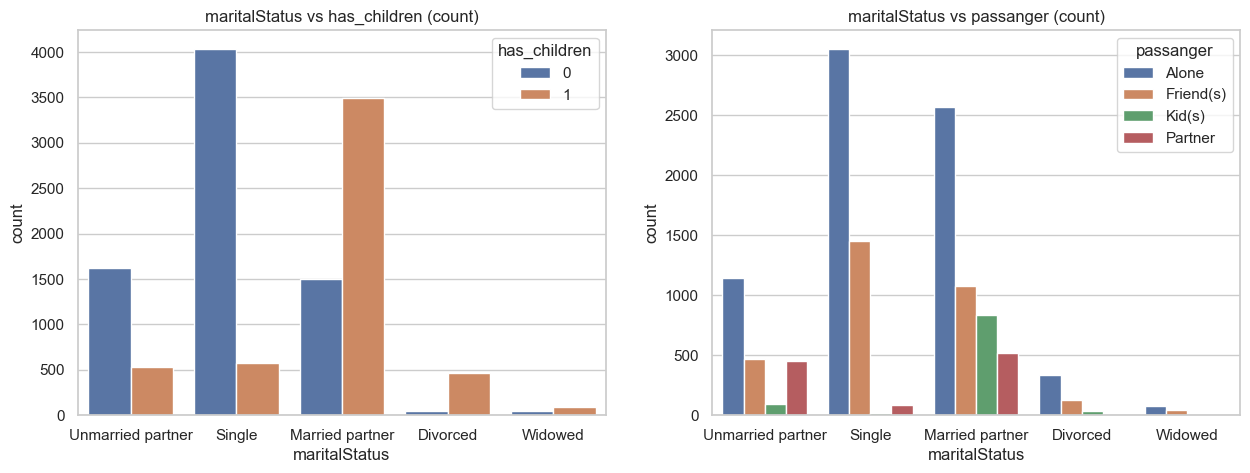

In [57]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='maritalStatus',hue='has_children',ax=axes[0])
sns.countplot(data,x='maritalStatus',hue='passanger',ax=axes[1])
axes[0].set_title('maritalStatus vs has_children (count)'); axes[1].set_title('maritalStatus vs passanger (count)')

Text(0.5, 1.0, 'age vs coupon (Acceptance ratio)')

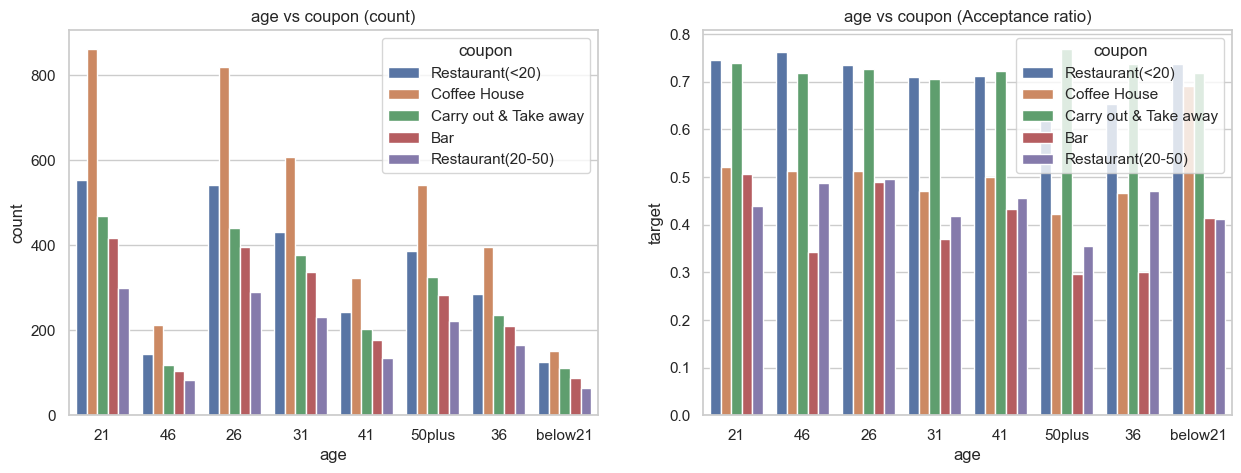

In [58]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='age',hue='coupon',ax=axes[0])
sns.barplot(ax=axes[1], x="age", y="target", hue='coupon', ci=None, data=data)
axes[0].set_title('age vs coupon (count)'); axes[1].set_title('age vs coupon (Acceptance ratio)')

__Observations:__
1. For Bar coupons, 21 and 26 age users accept the coupon more than others.
2. Mostly every age users accept Carry out & Take away and Restaurant(<20) coupons.
3. below21 age users have more acceptence for Coffee House coupons approx 70%.
4. Older age users have least acceptance for Bar Coupons.

Text(0.5, 1.0, 'Bar vs coupon (Acceptance ratio)')

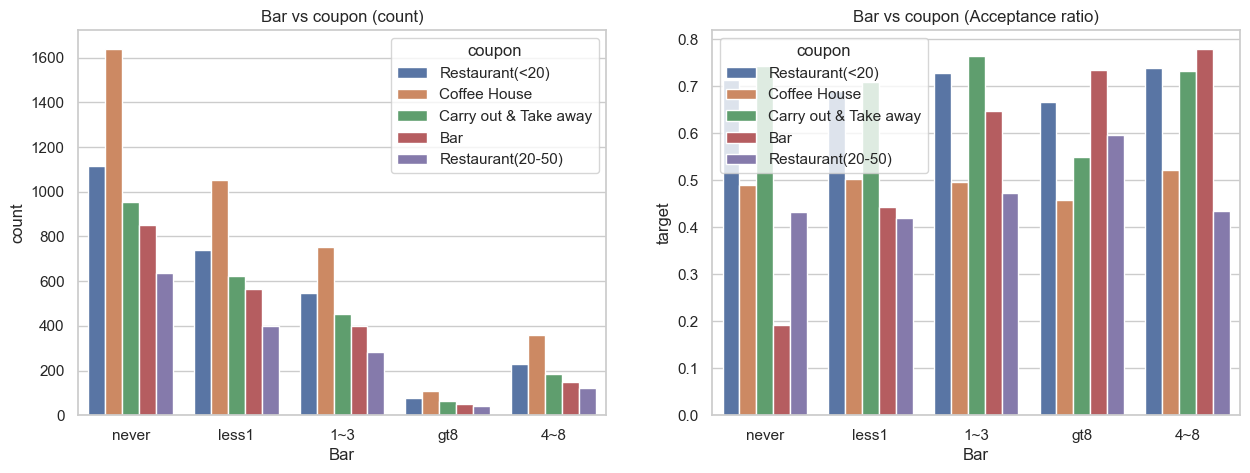

In [59]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='Bar',hue='coupon',ax=axes[0])
sns.barplot(ax=axes[1], x="Bar", y="target", hue='coupon', ci=None, data=data)
axes[0].set_title('Bar vs coupon (count)'); axes[1].set_title('Bar vs coupon (Acceptance ratio)')

In [60]:
df = bivariate_analysis('Bar','coupon',data.Bar,data.coupon,13)
df[df.coupon == 'Bar']

Bar coupon  Total_Count  Accepted  Rejected  %Accepted  %Rejected
23    4~8    Bar          150       117        33     78.000     22.000
18    gt8    Bar           49        36        13     73.469     26.531
13    1~3    Bar          397       257       140     64.736     35.264
8   less1    Bar          563       250       313     44.405     55.595
3   never    Bar          851       164       687     19.271     80.729

__Observations:__
1. Users who have already been in Bar 4 to 8 time or more than 8 times has a maximum acceptance ratio for Bar coupons.
2. Users who have never been to Bar have the least acceptance ratio for Bar coupons.
3. Acceptance of Bar coupons depends on the Bar feature.

Text(0.5, 1.0, 'CoffeeHouse vs coupon (Acceptance ratio)')

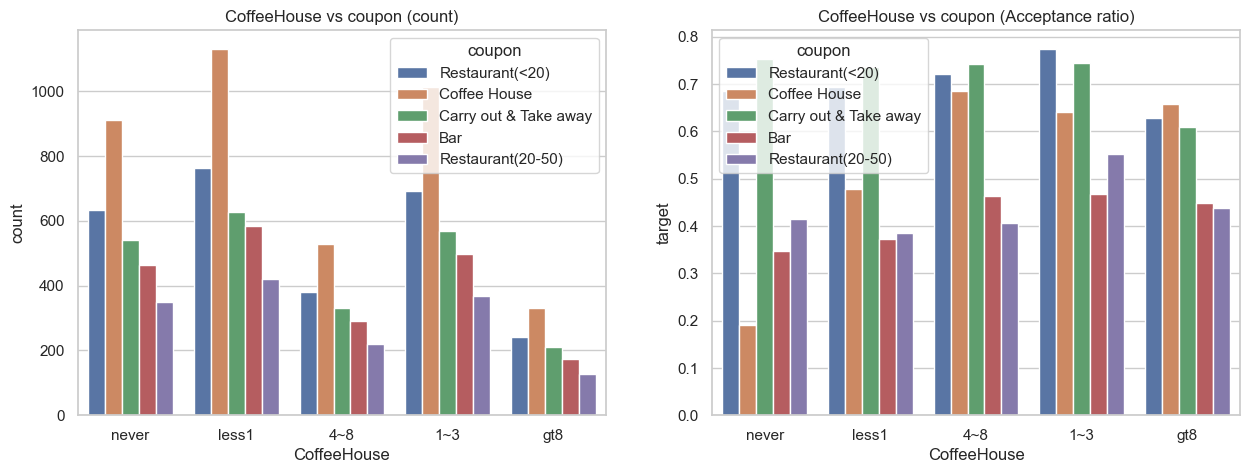

In [61]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='CoffeeHouse',hue='coupon',ax=axes[0])
sns.barplot(ax=axes[1], x="CoffeeHouse", y="target", hue='coupon', ci=None, data=data)
axes[0].set_title('CoffeeHouse vs coupon (count)'); axes[1].set_title('CoffeeHouse vs coupon (Acceptance ratio)')

In [62]:
df = bivariate_analysis('CoffeeHouse','coupon',data.CoffeeHouse,data.coupon,13)
df[df.coupon == 'Coffee House']

CoffeeHouse        coupon  Total_Count  Accepted  Rejected  %Accepted  %Rejected
11         4~8  Coffee House          529       362       167     68.431     31.569
21         gt8  Coffee House          331       218       113     65.861     34.139
16         1~3  Coffee House         1012       649       363     64.130     35.870
6        less1  Coffee House         1131       541       590     47.834     52.166
1        never  Coffee House          910       173       737     19.011     80.989

__Observations:__
1. Users who have already been in Coffee House 4 to 8 time or more than 8 times has a maximum acceptance ratio for Coffee House coupons.
2. Users who have never been to Coffee House have the least acceptance ratio for Coffee House coupons.
3. Acceptance of Coffee House coupons depends on the CoffeeHouse feature.

Text(0.5, 1.0, 'CarryAway vs coupon (Acceptance ratio)')

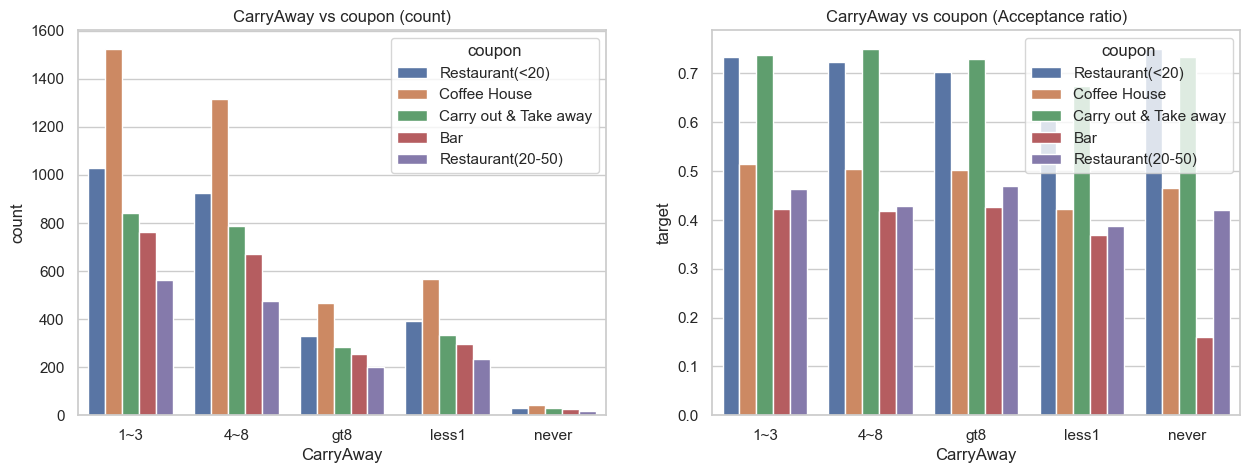

In [63]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='CarryAway',hue='coupon',ax=axes[0])
sns.barplot(ax=axes[1], x="CarryAway", y="target", hue='coupon', ci=None, data=data)
axes[0].set_title('CarryAway vs coupon (count)'); axes[1].set_title('CarryAway vs coupon (Acceptance ratio)')

In [64]:
df = bivariate_analysis('CarryAway','coupon',data.CarryAway,data.coupon,13)
df[df.coupon == 'Carry out & Take away']

CarryAway                 coupon  Total_Count  Accepted  Rejected  %Accepted  %Rejected
7        4~8  Carry out & Take away          787       591       196     75.095     24.905
2        1~3  Carry out & Take away          842       621       221     73.753     26.247
22     never  Carry out & Take away           30        22         8     73.333     26.667
12       gt8  Carry out & Take away          282       206        76     73.050     26.950
17     less1  Carry out & Take away          334       225       109     67.365     32.635

__Observations:__
1. Acceptance of Carry out & Take away coupons do not depend on the CarryAway feature.
2. Users who have never been to Carry out & Take away have 2nd highest acceptance ratio for Carry out coupons.
3. Every users have the good acceptance ratio for Carry out & Take away coupons

Text(0.5, 1.0, 'RestaurantLessThan20 vs coupon (Acceptance ratio)')

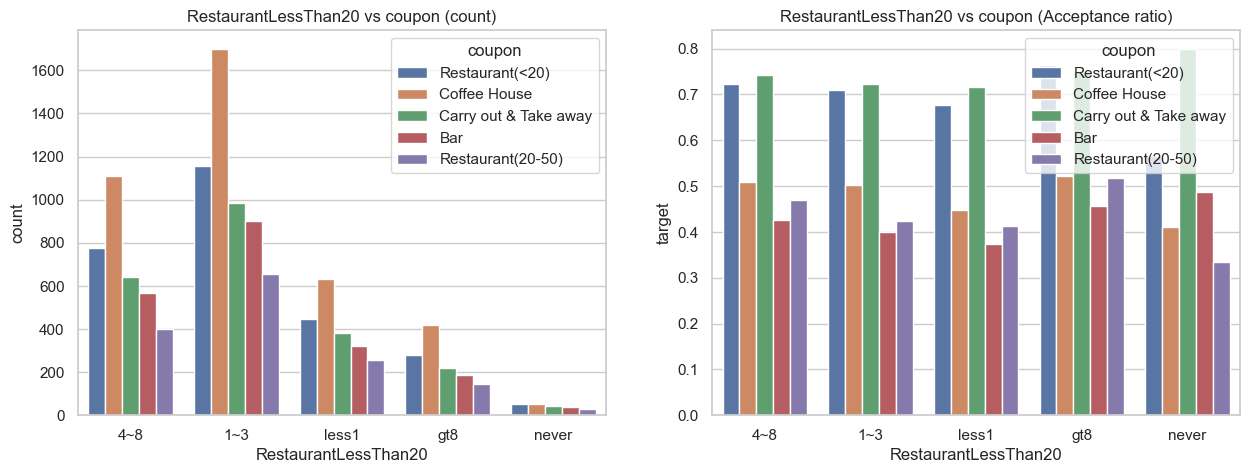

In [65]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='RestaurantLessThan20',hue='coupon',ax=axes[0])
sns.barplot(ax=axes[1], x="RestaurantLessThan20", y="target", hue='coupon', ci=None, data=data)
axes[0].set_title('RestaurantLessThan20 vs coupon (count)'); axes[1].set_title('RestaurantLessThan20 vs coupon (Acceptance ratio)')

In [66]:
df = bivariate_analysis('RestaurantLessThan20','coupon',data.RestaurantLessThan20,data.coupon,13)
df[df.coupon == 'Restaurant(<20)']

RestaurantLessThan20           coupon  Total_Count  Accepted  Rejected  %Accepted  %Rejected
15                  gt8  Restaurant(<20)          279       213        66     76.344     23.656
0                   4~8  Restaurant(<20)          776       561       215     72.294     27.706
5                   1~3  Restaurant(<20)         1154       818       336     70.884     29.116
10                less1  Restaurant(<20)          446       302       144     67.713     32.287
20                never  Restaurant(<20)           53        30        23     56.604     43.396

__Observations:__
1. Users who have already been in inexpensive Restaurant grater than 8 times have a maximum acceptance ratio for Restaurant(<20\$) coupons.
2. Users who have never been to inexpensive Restaurant have also 50% acceptance ratio for Restaurant(<20\$) coupons.
3. Acceptance of Restaurant(<20\$) coupons depends on the RestaurantLessThan20 feature.
4. Every users have the good acceptance ratio for Restaurant(<20\$) coupons

Text(0.5, 1.0, 'Restaurant20To50 vs coupon (Acceptance ratio)')

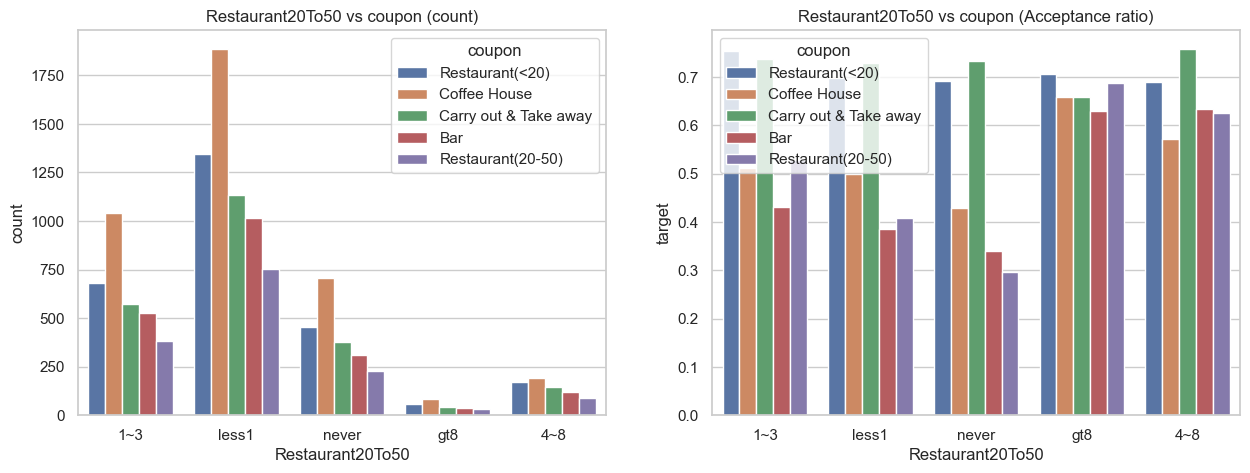

In [67]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data,x='Restaurant20To50',hue='coupon',ax=axes[0])
sns.barplot(ax=axes[1], x="Restaurant20To50", y="target", hue='coupon', ci=None, data=data)
axes[0].set_title('Restaurant20To50 vs coupon (count)'); axes[1].set_title('Restaurant20To50 vs coupon (Acceptance ratio)')

__Observations:__
1. Users who have already been in expensive Restaurant grater than 8 times have the highest acceptance ratio for Restaurant(20-50) coupons.
2. Users who have never been to expensive Restaurant have the least acceptance ratio for Restaurant(20-50) coupons.
3. Acceptance of Restaurant(20-50) coupons depends on the Restaurant20To50 feature.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null

In [69]:
#passanger

data.passanger.value_counts()

Alone        7178
Friend(s)    3166
Partner      1068
Kid(s)        981
Name: passanger, dtype: int64

In [70]:
data.weather.value_counts()

Sunny    9862
Snowy    1329
Rainy    1202
Name: weather, dtype: int64

In [71]:
data.coupon.value_counts()

Coffee House             3913
Restaurant(<20)          2708
Carry out & Take away    2275
Bar                      2010
Restaurant(20-50)        1487
Name: coupon, dtype: int64

In [72]:
data.expiration.value_counts()



1d    6938
2h    5455
Name: expiration, dtype: int64

In [73]:
data.gender.value_counts()


Female    6355
Male      6038
Name: gender, dtype: int64

In [74]:
data.age.value_counts()

21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: age, dtype: int64

In [75]:
data.maritalStatus.value_counts()

Married partner      4994
Single               4610
Unmarried partner    2155
Divorced              505
Widowed               129
Name: maritalStatus, dtype: int64

In [76]:
data.has_children.value_counts()

0    7243
1    5150
Name: has_children, dtype: int64

In [77]:
data.education.value_counts()

Some college - no degree                  4260
Bachelors degree                          4247
Graduate degree (Masters or Doctorate)    1793
Associates degree                         1126
High School Graduate                       880
Some High School                            87
Name: education, dtype: int64

In [78]:
#df.occupation.value_counts()

data.groupby(['occupation', 'target']).size().unstack('target').sort_values(by=1, ascending=False)

target                                       0    1
occupation                                         
Unemployed                                 835  993
Student                                    609  941
Computer & Mathematical                    592  768
Sales & Related                            464  602
Education&Training&Library                 444  477
Management                                 332  474
Office & Administrative Support            254  377
Arts Design Entertainment Sports & Media   298  319
Business & Financial                       231  305
Retired                                    267  222
Food Preparation & Serving Related         123  170
Healthcare Support                          71  166
Healthcare Practitioners & Technical        79  158
Transportation & Material Moving            88  126
Community & Social Services                121  115
Protective Service                          62  110
Architecture & Engineering                  62  110
Legal                                      115  103
Construction & Extraction                   47  103
Life Physical Social Science                71   97
Personal Care & Service                     77   95
Installation Maintenance & Repair           60   69
Production Occupations                      41   67
Building & Grounds Cleaning & Maintenance   18   24
Farming Fishing & Forestry                  20   21

In [79]:
data.income.value_counts()

$25000 - $37499     1972
$12500 - $24999     1795
$37500 - $49999     1760
$100000 or More     1688
$50000 - $62499     1624
Less than $12500    1013
$87500 - $99999      865
$75000 - $87499      844
$62500 - $74999      832
Name: income, dtype: int64

In [80]:
print(data.Bar.value_counts())
print(data.CoffeeHouse.value_counts())
print(data.CarryAway.value_counts())
print(data.RestaurantLessThan20.value_counts())
print(data.Restaurant20To50.value_counts())


never    5195
less1    3383
1~3      2432
4~8      1045
gt8       338
Name: Bar, dtype: int64
less1    3525
1~3      3138
never    2895
4~8      1752
gt8      1083
Name: CoffeeHouse, dtype: int64
1~3      4719
4~8      4171
less1    1819
gt8      1535
never     149
Name: CarryAway, dtype: int64
1~3      5397
4~8      3493
less1    2034
gt8      1253
never     216
Name: RestaurantLessThan20, dtype: int64
less1    6134
1~3      3204
never    2083
4~8       718
gt8       254
Name: Restaurant20To50, dtype: int64


# Feature Engineering

In [81]:
data.groupby(['occupation', 'target']).size().unstack('target').sort_values(by=1, ascending=False)

target                                       0    1
occupation                                         
Unemployed                                 835  993
Student                                    609  941
Computer & Mathematical                    592  768
Sales & Related                            464  602
Education&Training&Library                 444  477
Management                                 332  474
Office & Administrative Support            254  377
Arts Design Entertainment Sports & Media   298  319
Business & Financial                       231  305
Retired                                    267  222
Food Preparation & Serving Related         123  170
Healthcare Support                          71  166
Healthcare Practitioners & Technical        79  158
Transportation & Material Moving            88  126
Community & Social Services                121  115
Protective Service                          62  110
Architecture & Engineering                  62  110
Legal                                      115  103
Construction & Extraction                   47  103
Life Physical Social Science                71   97
Personal Care & Service                     77   95
Installation Maintenance & Repair           60   69
Production Occupations                      41   67
Building & Grounds Cleaning & Maintenance   18   24
Farming Fishing & Forestry                  20   21

In [82]:
df=data.copy()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null

In [84]:
#observation 
# 
# occupation feature has 25 no of distinct values, which creates very sparsity in data after Encoding. 
#Hence first,based on target and total count we will divide categories in classes 
# occupation_class where categorize all occupation in its suitable class.
occupation_dict = {'Healthcare Support':'High_Acceptance','Construction & Extraction':'High_Acceptance','Healthcare Practitioners & Technical':'High_Acceptance',
                   'Protective Service':'High_Acceptance','Architecture & Engineering':'High_Acceptance','Production Occupations':'Medium_High_Acceptance',
                    'Student':'Medium_High_Acceptance','Office & Administrative Support':'Medium_High_Acceptance','Transportation & Material Moving':'Medium_High_Acceptance',
                    'Building & Grounds Cleaning & Maintenance':'Medium_High_Acceptance','Management':'Medium_Acceptance','Food Preparation & Serving Related':'Medium_Acceptance',
                   'Life Physical Social Science':'Medium_Acceptance','Business & Financial':'Medium_Acceptance','Computer & Mathematical':'Medium_Acceptance',
                    'Sales & Related':'Medium_Low_Acceptance','Personal Care & Service':'Medium_Low_Acceptance','Unemployed':'Medium_Low_Acceptance',
                   'Farming Fishing & Forestry':'Medium_Low_Acceptance','Installation Maintenance & Repair':'Medium_Low_Acceptance','Education&Training&Library':'Low_Acceptance',
                    'Arts Design Entertainment Sports & Media':'Low_Acceptance','Community & Social Services':'Low_Acceptance','Legal':'Low_Acceptance','Retired':'Low_Acceptance'}
# occupation_dict
df['occupation_class'] = df['occupation'].map(occupation_dict)
print('Unique values:',df['occupation_class'].unique())
print('-'*50)
df['occupation_class'].describe()


Unique values: ['Medium_Low_Acceptance' 'High_Acceptance' 'Medium_High_Acceptance'
 'Low_Acceptance' 'Medium_Acceptance']
--------------------------------------------------


count                     12393
unique                        5
top       Medium_Low_Acceptance
freq                       3236
Name: occupation_class, dtype: object

In [85]:
# FE -- to_Coupon is combination of two features, toCoupon_GEQ15min and toCoupon_GEQ25min
to_Coupon = []
for i in range(df.shape[0]):
    if (list(df['toCoupon_GEQ15min'])[i] == 0):
        to_Coupon.append(0)
    elif (list(df['toCoupon_GEQ15min'])[i] == 1)and(list(df['toCoupon_GEQ25min'])[i] == 0):
        to_Coupon.append(1)
    else:
        to_Coupon.append(2)
        
df['to_Coupon'] = to_Coupon
print('Unique values:',df['to_Coupon'].unique())
print('-'*50)
df['to_Coupon'].describe()

Unique values: [0 1 2]
--------------------------------------------------


count    12393.000000
mean         0.681675
std          0.673151
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64

In [86]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'target', 'occupation_class', 'to_Coupon'], dtype='object')

In [87]:
# lets drop occupation column as we have new column occupation_class, toCoupon_GEQ15min', 'toCoupon_GEQ15min as we have merged them
df.drop(['occupation','toCoupon_GEQ15min', 'toCoupon_GEQ15min'],axis=1, inplace=True)
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ25min', 'target', 'occupation_class', 'to_Coupon'], dtype='object')

numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns
numeric_cols

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
for col in numeric_cols.columns:
    df[col]=normalizer.fit_transform(df[col].values.reshape(-1,1))


In [88]:
df.temperature.unique()
#numeric_cols

array([55, 80, 30], dtype=int64)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  income                12393 non-null  object
 12  Bar                   12393 non-null  object
 13  CoffeeHouse           12393 non-null  object
 14  CarryAway             12393 non-null  object
 15  RestaurantLessThan20  12393 non-null

In [90]:
data_fe=df.copy()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  income                12393 non-null  object
 12  Bar                   12393 non-null  object
 13  CoffeeHouse           12393 non-null  object
 14  CarryAway             12393 non-null  object
 15  RestaurantLessThan20  12393 non-null

In [92]:
df.head(10)

destination  passanger weather  temperature                 coupon expiration  gender age      maritalStatus  has_children                 education           income    Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ25min  target       occupation_class  to_Coupon
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)         1d  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       1  Medium_Low_Acceptance          0
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       0  Medium_Low_Acceptance          0
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away         2h  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       1  Medium_Low_Acceptance          1
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       0  Medium_Low_Acceptance          1
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House         1d  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       0  Medium_Low_Acceptance          1
5  No Urgent Place  Friend(s)   Sunny           80        Restaurant(<20)         2h  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       1  Medium_Low_Acceptance          1
6  No Urgent Place  Friend(s)   Sunny           55  Carry out & Take away         1d  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       1  Medium_Low_Acceptance          1
7  No Urgent Place     Kid(s)   Sunny           80        Restaurant(<20)         2h  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       1  Medium_Low_Acceptance          1
8  No Urgent Place     Kid(s)   Sunny           80  Carry out & Take away         2h  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       1  Medium_Low_Acceptance          1
9  No Urgent Place     Kid(s)   Sunny           80                    Bar         1d  Female  21  Unmarried partner             1  Some college - no degree  $37500 - $49999  never       never       1~3                  4~8              1~3                  0       0  Medium_Low_Acceptance          1

In [93]:
# Lets check target class and distribution

In [94]:
df.target.value_counts()

1    7012
0    5381
Name: target, dtype: int64

In [95]:
px.bar(df,x=df.target.value_counts().index , y=df.target.value_counts().values , title= 'Target Disribution' , width = 600, height = 600,color=df.target.value_counts().index )

In [96]:
# Observation
# distribution is not equal but it does not indicate class imbalance 

# Train Test Split

In [97]:
df.target.value_counts()

1    7012
0    5381
Name: target, dtype: int64

In [98]:
df.dropna( inplace=True)

In [99]:
x=df.drop('target',axis=1)
y=df.target

In [100]:
y.isnull().sum()

0

In [101]:
x_train,x_test, y_train,  y_test=train_test_split(x,y , test_size=0.2 , random_state=2, stratify= y)

In [102]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9914, 20)
(2479, 20)
(9914,)
(2479,)


In [103]:
x_train.head()

destination  passanger weather  temperature             coupon expiration  gender     age      maritalStatus  has_children                               education           income    Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ25min occupation_class  to_Coupon
1043  No Urgent Place    Partner   Sunny           80                Bar         2h    Male  50plus  Unmarried partner             0                        Bachelors degree  $100000 or More  never       never       1~3                  gt8            never                  0   Low_Acceptance          0
1295             Home      Alone   Sunny           55  Restaurant(20-50)         1d    Male  50plus  Unmarried partner             1                       Associates degree  $50000 - $62499  never         4~8       4~8                  1~3            less1                  0   Low_Acceptance          1
2052  No Urgent Place  Friend(s)   Sunny           80       Coffee House         2h  Female      36    Married partner             1  Graduate degree (Masters or Doctorate)  $50000 - $62499    4~8         gt8       4~8                  4~8              1~3                  0   Low_Acceptance          0
293              Home      Alone   Sunny           55                Bar         1d  Female      41           Divorced             1                        Bachelors degree  $12500 - $24999  never         gt8     less1                  1~3            never                  0   Low_Acceptance          0
950   No Urgent Place  Friend(s)   Sunny           80       Coffee House         1d    Male      21    Married partner             0                        Bachelors degree  $75000 - $87499  less1       less1       1~3                  4~8            less1                  0  High_Acceptance          1

# Encoding

In [104]:
#df = pd.get_dummies(df, columns=['destination','passanger','weather', 'coupon' , 'occupation_class','expiration','gender' ,'age','maritalStatus', 'education' , 'income','Bar' , 'CoffeeHouse','CarryAway' , 'RestaurantLessThan20', 'Restaurant20To50'] , drop_first=True) # use drop_first= True

#fit
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False,drop='if_binary')
print(x_train.shape)
ohe.fit(x_train[['destination','passanger','weather', 'coupon' , 'occupation_class','expiration','gender' ,'age','maritalStatus', 'education' , 'income','Bar' , 'CoffeeHouse','CarryAway' , 'RestaurantLessThan20', 'Restaurant20To50'] ])
print(x_train.shape)
#transform test
train_df= pd.DataFrame(ohe.transform(x_train[['destination','passanger','weather', 'coupon' , 'occupation_class','expiration','gender' ,'age','maritalStatus', 'education' , 'income','Bar' , 'CoffeeHouse','CarryAway' , 'RestaurantLessThan20', 'Restaurant20To50']]), columns = list(ohe.get_feature_names_out()))
print(x_train.shape)
print(train_df.shape)

x_train=x_train.drop(['destination','passanger','weather', 'coupon' , 'occupation_class','expiration','gender' ,'age','maritalStatus', 'education' , 'income','Bar' , 'CoffeeHouse','CarryAway' , 'RestaurantLessThan20', 'Restaurant20To50'], axis=1)
print(x_train.shape)

x_train=pd.concat([x_train.reset_index(drop=True), train_df.reset_index(drop=True)] , axis=1)
print(x_train.shape)

#transform test
test_df= pd.DataFrame(ohe.transform(x_test[['destination','passanger','weather', 'coupon' , 'occupation_class','expiration','gender' ,'age','maritalStatus', 'education' , 'income','Bar' , 'CoffeeHouse','CarryAway' , 'RestaurantLessThan20', 'Restaurant20To50']]), columns = list(ohe.get_feature_names_out()))
x_test=x_test.drop(['destination','passanger','weather', 'coupon' , 'occupation_class','expiration','gender' ,'age','maritalStatus', 'education' , 'income','Bar' , 'CoffeeHouse','CarryAway' , 'RestaurantLessThan20', 'Restaurant20To50'], axis=1)
x_test=pd.concat([x_test.reset_index(drop=True), test_df.reset_index(drop=True)] , axis=1)
print(x_test.shape)

(9914, 20)
(9914, 20)
(9914, 20)
(9914, 75)
(9914, 4)
(9914, 79)
(2479, 79)


In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9914, 79)
(2479, 79)
(9914,)
(2479,)


# Model Building 

# Logistic Regression

In [106]:
clf_lr = LogisticRegression(random_state=0,C=100).fit(x_train, y_train)
y_pred_train_lr= clf_lr.predict(x_train)
y_pred_test_lr= clf_lr.predict(x_test)

Train_AUC = roc_auc_score(y_train,clf_lr.predict_proba(x_train)[:,1])
Train_accuracy = accuracy_score(y_train,y_pred_train_lr)
Train_f1 = f1_score(y_train,y_pred_train_lr)

Test_AUC = roc_auc_score(y_test,clf_lr.predict_proba(x_test)[:,1])
Test_accuracy = accuracy_score(y_test,y_pred_test_lr)
Test_f1 = f1_score(y_test,y_pred_test_lr)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" , "Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["Logistic Regression",round(Train_AUC,3),round(Train_accuracy, 3), round(Train_f1,3),round(Test_AUC,3),round(Test_accuracy,3), round(Test_f1,3) ])
table = pd.read_html(summary_table.get_html_string())
Logistic_Regression_Result = table[0]
Logistic_Regression_Result

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  Logistic Regression                0.743           0.687     0.734                0.73           0.68    0.731

In [107]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_lr))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_lr))

Confusion Matrix - Training : [[2525 1780]
 [1323 4286]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[ 607  469]
 [ 325 1078]]


In [108]:
print(classification_report(y_train, y_pred_train_lr))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62      4305
           1       0.71      0.76      0.73      5609

    accuracy                           0.69      9914
   macro avg       0.68      0.68      0.68      9914
weighted avg       0.68      0.69      0.68      9914

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1076
           1       0.70      0.77      0.73      1403

    accuracy                           0.68      2479
   macro avg       0.67      0.67      0.67      2479
weighted avg       0.68      0.68      0.68      2479



## KNN

In [109]:

clf = KNeighborsClassifier(n_neighbors=21).fit(x_train, y_train)
y_pred_train_knn= clf.predict(x_train)
y_pred_test_knn= clf.predict(x_test)

Train_AUC_knn = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
Train_accuracy_knn = accuracy_score(y_train,y_pred_train_knn)
Train_f1_knn = f1_score(y_train,y_pred_train_knn)

Test_AUC_knn = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
Test_accuracy_knn = accuracy_score(y_test,y_pred_test_knn)
Test_f1_knn = f1_score(y_test,y_pred_test_knn)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" , "Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["K-Nearest Neighbor",round(Train_AUC_knn,3),round(Train_accuracy_knn, 3), round(Train_f1_knn,3),round(Test_AUC_knn,3),round(Test_accuracy_knn,3), round(Test_f1_knn,3) ])
table = pd.read_html(summary_table.get_html_string())
K_Nearest_Neighbor_Result = table[0]
K_Nearest_Neighbor_Result

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  K-Nearest Neighbor                0.795           0.726     0.772                0.73          0.689    0.745

In [110]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_knn))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_knn))

Confusion Matrix - Training : [[2596 1709]
 [1007 4602]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[ 582  494]
 [ 276 1127]]


In [111]:
print(classification_report(y_train, y_pred_train_knn))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.72      0.60      0.66      4305
           1       0.73      0.82      0.77      5609

    accuracy                           0.73      9914
   macro avg       0.72      0.71      0.71      9914
weighted avg       0.73      0.73      0.72      9914

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.68      0.54      0.60      1076
           1       0.70      0.80      0.75      1403

    accuracy                           0.69      2479
   macro avg       0.69      0.67      0.67      2479
weighted avg       0.69      0.69      0.68      2479



# Decision Tree

In [112]:
dt = DecisionTreeClassifier(random_state=1,max_depth=10 ,criterion='gini' )
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [113]:
dt.get_depth()

10

In [114]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [115]:
confusion_matrix(y_train, y_pred_train)

array([[3082, 1223],
       [ 861, 4748]], dtype=int64)

In [116]:
confusion_matrix(y_test, y_pred_test)

array([[ 636,  440],
       [ 347, 1056]], dtype=int64)

In [117]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      1076
           1       0.71      0.75      0.73      1403

    accuracy                           0.68      2479
   macro avg       0.68      0.67      0.67      2479
weighted avg       0.68      0.68      0.68      2479



In [118]:
print(accuracy_score(y_train, y_pred_train))
print("***************"*10)
print(accuracy_score(y_test, y_pred_test))

0.7897922130320758
******************************************************************************************************************************************************
0.682533279548205


In [119]:
clf_dt = DecisionTreeClassifier( max_depth=10 , min_samples_split= 10, random_state=101)
clf_dt.fit(x_train,y_train)
y_pred_train_dt= clf_dt.predict(x_train)
y_pred_test_dt= clf_dt.predict(x_test)

Train_AUC_dt = roc_auc_score(y_train,clf_dt.predict_proba(x_train)[:,1])
Train_accuracy_dt = accuracy_score(y_train,y_pred_train_dt)
Train_f1_dt = f1_score(y_train,y_pred_train_dt)

Test_AUC_dt = roc_auc_score(y_test,clf_dt.predict_proba(x_test)[:,1])
Test_accuracy_dt = accuracy_score(y_test,y_pred_test_dt)
Test_f1_dt = f1_score(y_test,y_pred_test_dt)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" , "Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["Decision Tree",round(Train_AUC_dt,3),round(Train_accuracy_dt, 3), round(Train_f1_dt,3),round(Test_AUC_dt,3),round(Test_accuracy_dt,3), round(Test_f1_dt,3) ])
table = pd.read_html(summary_table.get_html_string())
Decision_Tree_Result = table[0]
Decision_Tree_Result


Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  Decision Tree                0.863           0.781     0.813               0.726          0.679    0.725

In [120]:
clf_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

# Support Vector Machine

In [121]:
clf_svc = SVC(kernel='rbf')
clf_svc.fit(x_train, y_train)
y_pred_train_svm= clf_svc.predict(x_train)
y_pred_test_svm= clf_svc.predict(x_test)

Train_AUC_svc = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
Train_accuracy_svc = accuracy_score(y_train,y_pred_train_svm)
Train_f1_svc = f1_score(y_train,y_pred_train_svm)

Test_AUC_svc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
Test_accuracy_svc = accuracy_score(y_test,y_pred_test_svm)
Test_f1_svc = f1_score(y_test,y_pred_test_svm)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading

#summary_table.add_row(["Support Vector Classification","Ordinal Encoding",best_C_OrEnc,'',round(Train_loss_OrEnc,3),round(Train_AUC_OrEnc,3),round(Test_loss_OrEnc,3),round(Test_AUC_OrEnc,3)])
summary_table.add_row(["SVM",round(Train_AUC_svc,3),round(Train_accuracy_svc, 3), round(Train_f1_svc,3),round(Test_AUC_svc,3),round(Test_accuracy_svc,3), round(Test_f1_svc,3) ])

table = pd.read_html(summary_table.get_html_string())
Support_Vector_Classifier_Result = table[0]
Support_Vector_Classifier_Result

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0   SVM                0.795           0.576     0.725                0.73          0.579    0.727

In [122]:
clf_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [123]:
confusion_matrix(y_train, y_pred_train_svm)

array([[ 178, 4127],
       [  78, 5531]], dtype=int64)

In [124]:
confusion_matrix(y_test, y_pred_test_svm)

array([[  46, 1030],
       [  14, 1389]], dtype=int64)

In [125]:
# Cross Validation required
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(clf_svc, x_train, y_train, cv=10)
test_accuracy = cross_val_score(clf_svc, x_test, y_test, cv=10)
print(train_accuracy)
print("***************"*5)
print('mean train accuracy', train_accuracy.mean())
print("***************"*5)
print('max train accuracy', train_accuracy.max())
print("***************"*5)
print(test_accuracy)
print("***************"*5)
print('mean test accuracy',test_accuracy.mean())
print("***************"*5)
print('max test accuracy',test_accuracy.max())

[0.56955645 0.56653226 0.56754032 0.56854839 0.56710394 0.56710394
 0.57315843 0.57013118 0.57214934 0.5691221 ]
***************************************************************************
mean train accuracy 0.5690946339637382
***************************************************************************
max train accuracy 0.5731584258324924
***************************************************************************
[0.56451613 0.56451613 0.56451613 0.52419355 0.56451613 0.53225806
 0.52016129 0.56854839 0.56854839 0.56680162]
***************************************************************************
mean test accuracy 0.5538575812981585
***************************************************************************
max test accuracy 0.5685483870967742


# Ensemble Methods
## Random Forest

In [126]:
#High Varience, Lets Use Randon forest
#Random forest

In [127]:
rf = RandomForestClassifier(n_estimators=1000,criterion='gini', random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [128]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [129]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [130]:
confusion_matrix(y_train, y_pred_rf_train)

array([[4239,   66],
       [  38, 5571]], dtype=int64)

In [131]:
confusion_matrix(y_test, y_pred_rf_test)

array([[ 699,  377],
       [ 233, 1170]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1076
           1       0.76      0.83      0.79      1403

    accuracy                           0.75      2479
   macro avg       0.75      0.74      0.74      2479
weighted avg       0.75      0.75      0.75      2479



In [133]:
print(accuracy_score(y_train, y_pred_rf_train))
print("***************"*10)
print(accuracy_score(y_test, y_pred_rf_test))

0.9895097841436352
******************************************************************************************************************************************************
0.7539330375151271


In [134]:
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV


In [135]:
#Hyper parameter tuning

clf_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,max_features='log2',min_samples_leaf=3,random_state=42, n_jobs=-1)
parameters = {'max_depth':[10,20,50], 'n_estimators':[1000,2000],
              'max_features': ['auto', 'sqrt', 'log2', None]}
model = RandomizedSearchCV(clf_rf, parameters, cv=5, scoring='roc_auc') #scoring='roc_auc' or 'neg_log_loss'
model.fit(x_train, y_train)

best_depth = model.best_params_['max_depth']
best_n_estimators = model.best_params_['n_estimators']

clf_rf = RandomForestClassifier(n_estimators=best_n_estimators,criterion='gini',max_depth=best_depth, max_features='log2', min_samples_leaf=3, random_state=0, n_jobs=-1)
clf_rf.fit(x_train, y_train)
y_pred_train_rf= clf_rf.predict(x_train)
y_pred_test_rf= clf_rf.predict(x_test)

Train_AUC_rf = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
Train_accuracy_rf = accuracy_score(y_train,y_pred_train_rf)
Train_f1_rf = f1_score(y_train,y_pred_train_rf)

Test_AUC_rf = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
Test_accuracy_rf = accuracy_score(y_test,y_pred_test_rf)
Test_f1_rf = f1_score(y_test,y_pred_test_rf)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading

#summary_table.add_row(["Support Vector Classification","Ordinal Encoding",best_C_OrEnc,'',round(Train_loss_OrEnc,3),round(Train_AUC_OrEnc,3),round(Test_loss_OrEnc,3),round(Test_AUC_OrEnc,3)])
summary_table.add_row(["Random Forest",round(Train_AUC_rf,3),round(Train_accuracy_rf, 3), round(Train_f1_rf,3),round(Test_AUC_rf,3),round(Test_accuracy_rf,3), round(Test_f1_rf,3) ])

table = pd.read_html(summary_table.get_html_string())
Random_Forest_Classifier_Result = table[0]
Random_Forest_Classifier_Result

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  Random Forest                0.795           0.893      0.91                0.73          0.738    0.783

In [136]:
 model.best_estimator_

RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=3,
                       n_estimators=1000, n_jobs=-1, random_state=42)

In [137]:
model.best_params_

{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 50}

In [138]:
model.best_score_

0.8100768134997283

In [139]:
confusion_matrix(y_train, y_pred_train_rf)

array([[3526,  779],
       [ 278, 5331]], dtype=int64)

In [140]:
confusion_matrix(y_test, y_pred_test_rf)

array([[ 655,  421],
       [ 229, 1174]], dtype=int64)

In [141]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1076
           1       0.74      0.84      0.78      1403

    accuracy                           0.74      2479
   macro avg       0.74      0.72      0.73      2479
weighted avg       0.74      0.74      0.73      2479



In [142]:
# Cross Validation required
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(clf_rf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(clf_rf, x_test, y_test, cv=10)
print(train_accuracy)
print("***************"*5)
print('mean train accuracy', train_accuracy.mean())
print("***************"*5)
print('max train accuracy', train_accuracy.max())
print("***************"*5)
print(test_accuracy)
print("***************"*5)
print('mean test accuracy',test_accuracy.mean())
print("***************"*5)
print('max test accuracy',test_accuracy.max())

[0.74899194 0.75604839 0.75705645 0.72782258 0.74974773 0.75075681
 0.7457114  0.71745711 0.75378406 0.74369324]
***************************************************************************
mean train accuracy 0.7451069708017317
***************************************************************************
max train accuracy 0.7570564516129032
***************************************************************************
[0.73790323 0.74193548 0.72983871 0.65725806 0.72580645 0.7016129
 0.64516129 0.76612903 0.72177419 0.71659919]
***************************************************************************
mean test accuracy 0.714401854512211
***************************************************************************
max test accuracy 0.7661290322580645


##  extra_tree Classifier

In [143]:
clf_eta = ExtraTreesClassifier(n_estimators=1000,max_depth=50 ,random_state=0, n_jobs=-1)
clf_eta.fit(x_train, y_train)
y_pred_train_eta= clf_eta.predict(x_train)
y_pred_text_eta= clf_eta.predict(x_test)

Train_AUC_eta = roc_auc_score(y_train,clf_eta.predict_proba(x_train)[:,1])
Train_accuracy_eta = accuracy_score(y_train,y_pred_train_eta)
Train_f1_eta = f1_score(y_train,y_pred_train_eta)

Test_AUC_eta = roc_auc_score(y_test,clf_eta.predict_proba(x_test)[:,1])
Test_accuracy_eta = accuracy_score(y_test,y_pred_text_eta)
Test_f1_eta = f1_score(y_test,y_pred_text_eta)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading

#summary_table.add_row(["Support Vector Classification","Ordinal Encoding",best_C_OrEnc,'',round(Train_loss_OrEnc,3),round(Train_AUC_OrEnc,3),round(Test_loss_OrEnc,3),round(Test_AUC_OrEnc,3)])
summary_table.add_row(["ExtraTree Classifier",round(Train_AUC_eta,3),round(Train_accuracy_eta, 3), round(Train_f1_eta,3),round(Test_AUC_eta,3),round(Test_accuracy_eta,3), round(Test_f1_eta,3) ])

table = pd.read_html(summary_table.get_html_string())
ExtraTree_Classifier_Result = table[0]
ExtraTree_Classifier_Result

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  ExtraTree Classifier                  1.0            0.99     0.991               0.805          0.753    0.791

In [144]:
print(classification_report(y_train, y_pred_train_eta))
print("*****************************"*5)
print(classification_report(y_test, y_pred_text_eta))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4305
           1       1.00      0.98      0.99      5609

    accuracy                           0.99      9914
   macro avg       0.99      0.99      0.99      9914
weighted avg       0.99      0.99      0.99      9914

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1076
           1       0.76      0.83      0.79      1403

    accuracy                           0.75      2479
   macro avg       0.75      0.74      0.74      2479
weighted avg       0.75      0.75      0.75      2479



In [145]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_eta))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_text_eta))

Accuracy - Training : 0.9895097841436352
*************************************************************************************************************************************************
Accuracy - Test : 0.7531262605889472


In [146]:
# Cross Validation required
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(clf_eta, x_train, y_train, cv=10)
test_accuracy = cross_val_score(clf_eta, x_test, y_test, cv=10)
print(train_accuracy)
print("***************"*5)
print('mean train accuracy', train_accuracy.mean())
print("***************"*5)
print('max train accuracy', train_accuracy.max())
print("***************"*5)
print(test_accuracy)
print("***************"*5)
print('mean test accuracy',test_accuracy.mean())
print("***************"*5)
print('max test accuracy',test_accuracy.max())

[0.7358871  0.76915323 0.76209677 0.73689516 0.75378406 0.75580222
 0.75277497 0.72956609 0.76084763 0.76488396]
***************************************************************************
mean train accuracy 0.7521691188437877
***************************************************************************
max train accuracy 0.7691532258064516
***************************************************************************
[0.74596774 0.74596774 0.68145161 0.65725806 0.73387097 0.72580645
 0.70564516 0.75806452 0.74193548 0.73279352]
***************************************************************************
mean test accuracy 0.722876126420269
***************************************************************************
max test accuracy 0.7580645161290323


## Adaboost

In [147]:
from sklearn.ensemble import AdaBoostClassifier


clf_adb = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=1000,learning_rate=0.1,random_state=42)
clf_adb.fit(x_train, y_train)
y_pred_train_adb= clf_adb.predict(x_train)
y_pred_test_adb= clf_adb.predict(x_test)


Train_AUC_adb = roc_auc_score(y_train,clf_adb.predict_proba(x_train)[:,1])
Train_accuracy_adb = accuracy_score(y_train,y_pred_train_adb)
Train_f1_adb = f1_score(y_train,y_pred_train_adb)

Test_AUC_adb = roc_auc_score(y_test,clf_adb.predict_proba(x_test)[:,1])
Test_accuracy_adb = accuracy_score(y_test,y_pred_test_adb)
Test_f1_adb = f1_score(y_test,y_pred_test_adb)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["AdaBoost Classifier",round(Train_AUC_adb,3),round(Train_accuracy_adb, 3), round(Train_f1_adb,3),round(Test_AUC_adb,3),round(Test_accuracy_adb,3), round(Test_f1_adb,3) ])
table = pd.read_html(summary_table.get_html_string())
AdaBoost_Classifier_Result = table[0]
AdaBoost_Classifier_Result

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  AdaBoost Classifier                  1.0            0.99     0.991               0.769          0.735    0.774

In [148]:
confusion_matrix(y_train, y_pred_train_adb)

array([[4202,  103],
       [   1, 5608]], dtype=int64)

In [149]:
confusion_matrix(y_test, y_pred_test_adb)

array([[ 694,  382],
       [ 275, 1128]], dtype=int64)

In [152]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_adb))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_adb))

Accuracy - Training : 0.9895097841436352
*************************************************************************************************************************************************
Accuracy - Test : 0.7349737797498992


## Catboost


In [166]:
x=data_fe.drop('target', axis=1)
y=data_fe.target

In [167]:
x_train_fe,x_test_fe ,  y_train_fe,y_test_fe=train_test_split(x,y, test_size=0.2, random_state=1)

In [168]:
x_train_fe.head()

destination  passanger weather  temperature                 coupon expiration  gender     age      maritalStatus  has_children                 education           income    Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ25min        occupation_class  to_Coupon
10881             Work      Alone   Sunny           80      Restaurant(20-50)         2h    Male      41             Single             0          Bachelors degree  $62500 - $74999    1~3         4~8       1~3                  4~8              4~8                  0       Medium_Acceptance          0
2172   No Urgent Place  Friend(s)   Sunny           55  Carry out & Take away         1d    Male      21             Single             0          Bachelors degree  $100000 or More    4~8         gt8       4~8                  gt8              1~3                  0  Medium_High_Acceptance          1
614    No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h  Female      21    Married partner             1  Some college - no degree  $25000 - $37499  never         gt8       1~3                  gt8              1~3                  0  Medium_High_Acceptance          1
1034   No Urgent Place      Alone   Sunny           55        Restaurant(<20)         1d    Male  50plus  Unmarried partner             0          Bachelors degree  $100000 or More  never       never       1~3                  gt8            never                  0          Low_Acceptance          0
11208             Work      Alone   Snowy           30           Coffee House         1d    Male      26             Single             0          Bachelors degree  $12500 - $24999  less1         gt8       gt8                  gt8            less1                  0  Medium_High_Acceptance          0

In [169]:
cat_cols = list((x_train_fe.select_dtypes(include = np.object)).columns)
cat_cols.append('temperature')  #toCoupon_GEQ25min, to_Coupon, has_children

for i in cat_cols:
    print(i, data_fe[i].unique())


destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
income ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Bar ['never' 'less1' '1~3' 'gt8' '4~8']
CoffeeHouse ['never' 'less1' '4~8' '1~3' 'gt8']
CarryAway ['1~3' '4~8' 'gt8' 'less1' 'never']
RestaurantLessThan20 ['4~8' '1~3' 'less1' 'gt8' 'never']
Restaurant20To50 ['1~3' 'less1' 'never' 'gt8' '4~8']
occupati

### Catboost model on un-encoded data

In [173]:

import time

start = time.time()

pool_train = Pool(x_train_fe, y_train_fe,
                  cat_features = cat_cols)

pool_test = Pool(x_test_fe, cat_features =cat_cols)

#params = {     'eval_metric': 'Accuracy', 'iterations': 2000, 'feature_border_type': 'GreedyLogSum',
 #'l2_leaf_reg': 3, 'random_seed': 0, 'depth': 9, 'loss_function': 'Logloss', 'learning_rate': 0.026,
 #'score_function': 'Cosine', 'colsample_bylevel': 0.086, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}


params = {     'eval_metric': 'Accuracy',
 'iterations': 2000,
#'objective': 'Accuracy',
'random_seed': 42,
 'loss_function': 'Logloss',
'learning_rate':0.1

         }

clf_ctbfe = CatBoostClassifier(**params)

clf_ctbfe.fit(x_train_fe, y_train_fe , cat_features=cat_cols ,eval_set=(x_test_fe, y_test_fe),plot=True , verbose= 0)



y_pred_train_ctbfe= clf_ctbfe.predict(x_train_fe)
y_pred_test_ctbfe= clf_ctbfe.predict(x_test_fe)

end = time.time()
diff = end - start
print('Execution time:', diff)

Train_AUC_ctbfe = roc_auc_score(y_train_fe,clf_ctbfe.predict_proba(x_train_fe)[:,1])
Train_accuracy_ctbfe = accuracy_score(y_train_fe,y_pred_train_ctbfe)
Train_f1_ctbfe = f1_score(y_train_fe,y_pred_train_ctbfe)

Test_AUC_ctbfe = roc_auc_score(y_test_fe,clf_ctbfe.predict_proba(x_test_fe)[:,1])
Test_accuracy_ctbfe = accuracy_score(y_test_fe,y_pred_test_ctbfe)
Test_f1_ctbfe = f1_score(y_test_fe,y_pred_test_ctbfe)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["CatBoost Classifier",round(Train_AUC_ctbfe,3),round(Train_accuracy_ctbfe, 3), round(Train_f1_ctbfe,3),round(Test_AUC_ctbfe,3),round(Test_accuracy_ctbfe,3), round(Test_f1_ctbfe,3) ])

table = pd.read_html(summary_table.get_html_string())
CatBoostfe_Classifier_Result = table[0]
(CatBoostfe_Classifier_Result)





MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Execution time: 661.7943525314331


Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  CatBoost Classifier                0.922           0.842     0.865               0.827           0.76    0.793

### Catboost on encoded data

In [176]:
import time

start = time.time()

clf_ctb = CatBoostClassifier()
#parameters = {'max_depth':[1, 5, 10, 50], 'n_estimators':[50,100,500,1000,2000]}
#model = RandomizedSearchCV(clf, parameters, cv=5, scoring='roc_auc') #scoring='roc_auc' or 'neg_log_loss'
#model.fit(x_train, y_train)
#best_n_estimators = model.best_params_['n_estimators']
params = {     'eval_metric': 'Accuracy',
 'iterations': 2500,
#'objective': 'Accuracy',
'random_seed': 0,
 'loss_function': 'Logloss',
'verbose':0

}

clf_ctb =CatBoostClassifier(**params)


clf_ctb.fit(x_train, y_train , eval_set=(x_test, y_test),plot=True , verbose= 0)
y_pred_train_ctb= clf_ctb.predict(x_train)
y_pred_test_ctb= clf_ctb.predict(x_test)

end = time.time()
diff = end - start
print('Execution time:', diff)

Train_AUC_ctb = roc_auc_score(y_train,clf_ctb.predict_proba(x_train)[:,1])
Train_accuracy_ctb = accuracy_score(y_train,y_pred_train_ctb)
Train_f1_ctb = f1_score(y_train,y_pred_train_ctb)

Test_AUC_ctb = roc_auc_score(y_test,clf_ctb.predict_proba(x_test)[:,1])
Test_accuracy_ctb = accuracy_score(y_test,y_pred_test_ctb)
Test_f1_ctb = f1_score(y_test,y_pred_test_ctb)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["CatBoost_OHE Classifier",round(Train_AUC_ctb,3),round(Train_accuracy_ctb, 3), round(Train_f1_ctb,3),round(Test_AUC_ctb,3),round(Test_accuracy_ctb,3), round(Test_f1_ctb,3) ])

table = pd.read_html(summary_table.get_html_string())
CatBoost_Classifier_Result = table[0]
CatBoost_Classifier_Result


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Execution time: 85.82023549079895


Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  CatBoost_OHE Classifier                0.938           0.859     0.881               0.831          0.764    0.801

In [177]:
clf_ctb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Accuracy',
 'iterations': 2500,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.03748700

In [178]:
print(confusion_matrix(y_train, y_pred_train_ctb))
print("*****************************"*5)
print(confusion_matrix(y_test, y_pred_test_ctb))

[[3363  942]
 [ 454 5155]]
*************************************************************************************************************************************************
[[ 712  364]
 [ 222 1181]]


In [179]:
# Cross Validation required
from sklearn.model_selection import cross_val_score
start=time.time()
train_accuracy = cross_val_score(clf_ctb, x_train, y_train, cv=10, verbose=0)
test_accuracy = cross_val_score(clf_ctb, x_test, y_test, cv=10, verbose=0)
end=time.time()
diff= end-start
print('Execution Time :', diff  )
print(train_accuracy)
print("***************"*5)
print('mean train accuracy', train_accuracy.mean())
print("***************"*5)
print('max train accuracy', train_accuracy.max())
print("***************"*5)
print(test_accuracy)
print("***************"*5)
print('mean test accuracy',test_accuracy.mean())
print("***************"*5)
print('max test accuracy',test_accuracy.max())

Execution Time : 2000.1265182495117
[0.76108871 0.7671371  0.76008065 0.74395161 0.75983855 0.76589304
 0.76690212 0.73259334 0.76387487 0.76892028]
***************************************************************************
mean train accuracy 0.7590280264314313
***************************************************************************
max train accuracy 0.768920282542886
***************************************************************************
[0.75       0.77822581 0.71774194 0.68951613 0.73387097 0.71370968
 0.7016129  0.75806452 0.73790323 0.74089069]
***************************************************************************
mean test accuracy 0.7321535849549432
***************************************************************************
max test accuracy 0.7782258064516129


### Feature Importances using Shap values

In [180]:
#!pip install shap
import shap
shap.initjs()

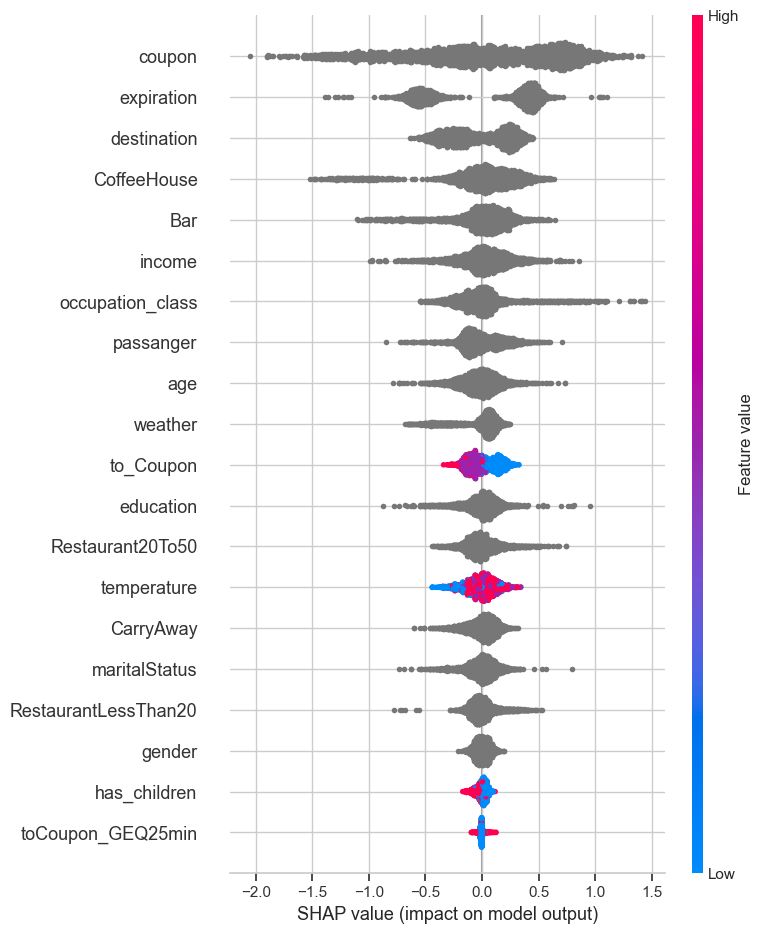

In [181]:
explainer = shap.Explainer(clf_ctbfe)
shap_values = explainer.shap_values(x_test_fe)

shap.summary_plot(shap_values, x_test_fe)
#shap.summary_plot(shap_values[0], x_test)
#For example, high values of the Latitude variable have a high negative contribution on the prediction,
#while low values have a high positive contribution.



#shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)
#We will examine the first sample in the testing set to determine which features contributed to the "0" result

#shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)
#Let’s look at customer churn samples with label “1”.




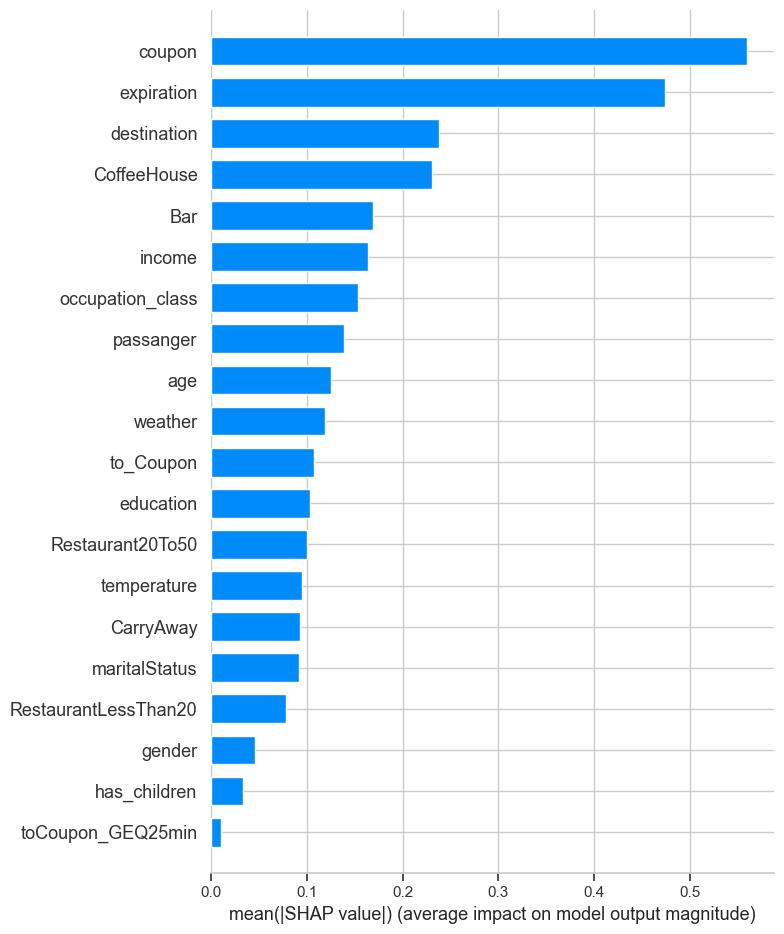

In [182]:
shap.summary_plot(shap_values, features=x_test_fe, feature_names=x_test_fe.columns, plot_type='bar')
#Here the features are ordered from the highest to the lowest effect on the prediction.
#It takes in account the absolute SHAP value, so it does not matter if the feature affects
#the prediction in a positive or negative way.

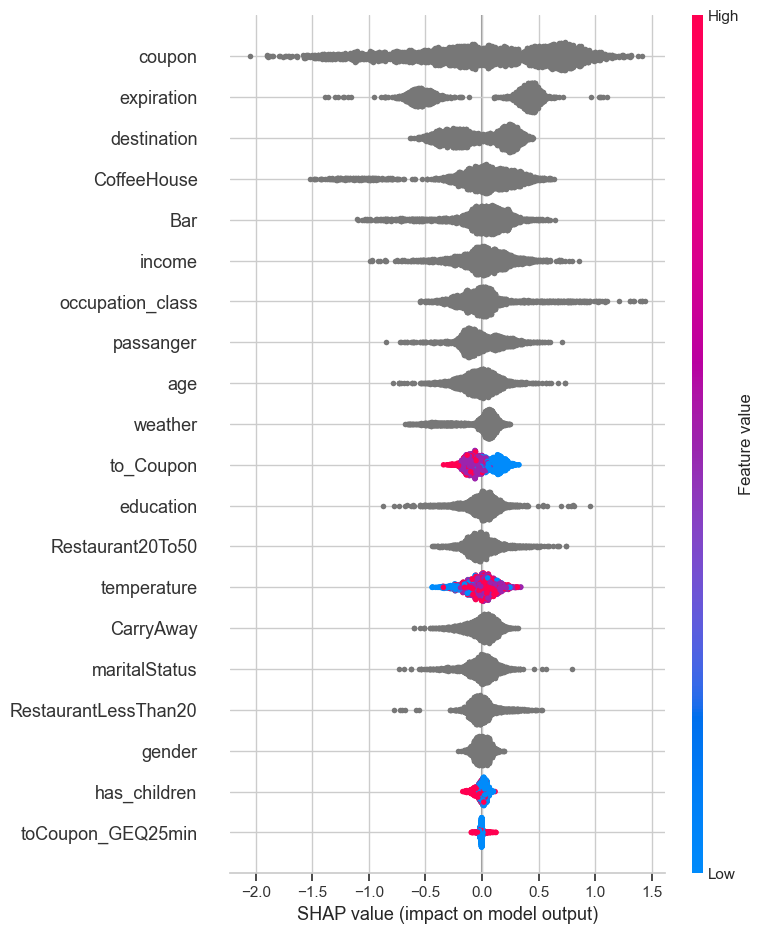

model parameters {'iterations': 2000, 'learning_rate': 0.1, 'loss_function': 'Logloss', 'random_seed': 42, 'eval_metric': 'Accuracy'}
model seed 42


feature_importance         feature_names
4            15.565081                coupon
13            8.594777           CoffeeHouse
11            7.940848                income
18            7.289120      occupation_class
7             6.414208                   age
12            6.212194                   Bar
10            5.488632             education
5             5.413842            expiration
16            4.698458      Restaurant20To50
14            4.330059             CarryAway
1             4.299769             passanger
0             4.296221           destination
3             4.269554           temperature
8             4.097025         maritalStatus
15            4.071403  RestaurantLessThan20
2             2.824733               weather
19            2.071586             to_Coupon
6             1.266393                gender
9             0.547773          has_children
17            0.308323     toCoupon_GEQ25min

In [183]:
importances = pd.DataFrame (clf_ctbfe.get_feature_importance (prettified=True), columns = ["Feature Id", "Importances"])
#print (importances.head (20))
shap_values = clf_ctbfe.get_feature_importance (Pool (x_test_fe, y_test_fe,cat_cols), type = "ShapValues")
#print (shap_values)
shap_values = shap_values[:,: -1]
shap.summary_plot(shap_values,x_test_fe)
#shap.plots.bar(shap_values)

#fig=shap.summary_plot(shap_values, x_test_fe, show=False)

print("model parameters", clf_ctbfe.get_params ())
print("model seed", clf_ctbfe.random_seed_)
pd.DataFrame({'feature_importance': clf_ctbfe.get_feature_importance(Pool (x_test_fe,y_test_fe, cat_cols)), 'feature_names': x_test_fe.columns}).sort_values(by=['feature_importance'],  ascending=False)

## Stacking Classifier

In [184]:
from sklearn.ensemble import StackingClassifier
params = {     'eval_metric': 'Accuracy',
 'iterations': 1000,
 'loss_function': 'Logloss',

}


estimators = [
            ('RF',RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=50,max_features='log2',min_samples_leaf=3, random_state=42, n_jobs=-1)),
            ('SVC', SVC(C=1,kernel='rbf',class_weight='balanced',probability=True)),
             ('CatBoost',CatBoostClassifier(**params))]
        

clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf_stack.fit(x_train, y_train)
y_pred_train_stack= clf_stack.predict(x_train)
y_pred_test_stack= clf_stack.predict(x_test)


Train_AUC_stack = roc_auc_score(y_train,y_pred_train_stack)
Train_accuracy_stack = accuracy_score(y_train,y_pred_train_stack)
Train_f1_stack = f1_score(y_train,y_pred_train_stack)

Test_AUC_stack = roc_auc_score(y_test,y_pred_test_stack)
Test_accuracy_stack = accuracy_score(y_test,y_pred_test_stack)
Test_f1_stack = f1_score(y_test,y_pred_test_stack)

summary_table = PrettyTable(["Model", "Train_roc_auc_score", "Train_accuracy","Train_f1" ,"Test_roc_auc_score",'Test_accuracy' ,'Test_f1']) #heading
summary_table.add_row(["Stacking Classifier",round(Train_AUC_stack,3),round(Train_accuracy_stack, 3), round(Train_f1_stack,3),round(Test_AUC_stack,3),round(Test_accuracy_stack,3), round(Test_f1_stack,3) ])

table = pd.read_html(summary_table.get_html_string())
Stacking_Classifier_Result = table[0]
Stacking_Classifier_Result


Learning rate set to 0.027437
0:	learn: 0.6502925	total: 45.2ms	remaining: 45.1s
1:	learn: 0.6738955	total: 76.7ms	remaining: 38.3s
2:	learn: 0.6745007	total: 108ms	remaining: 35.7s
3:	learn: 0.6789389	total: 139ms	remaining: 34.6s
4:	learn: 0.6833770	total: 171ms	remaining: 34s
5:	learn: 0.6810571	total: 211ms	remaining: 35s
6:	learn: 0.6971959	total: 244ms	remaining: 34.7s
7:	learn: 0.6945733	total: 297ms	remaining: 36.8s
8:	learn: 0.6958846	total: 342ms	remaining: 37.7s
9:	learn: 0.6914464	total: 400ms	remaining: 39.6s
10:	learn: 0.6902360	total: 428ms	remaining: 38.5s
11:	learn: 0.6961872	total: 460ms	remaining: 37.8s
12:	learn: 0.6950777	total: 506ms	remaining: 38.4s
13:	learn: 0.6953803	total: 536ms	remaining: 37.7s
14:	learn: 0.6942707	total: 585ms	remaining: 38.4s
15:	learn: 0.6931612	total: 633ms	remaining: 38.9s
16:	learn: 0.6951785	total: 661ms	remaining: 38.2s
17:	learn: 0.6951785	total: 692ms	remaining: 37.7s
18:	learn: 0.6957837	total: 739ms	remaining: 38.2s
19:	learn: 0.

164:	learn: 0.7491426	total: 5.85s	remaining: 29.6s
165:	learn: 0.7493444	total: 5.87s	remaining: 29.5s
166:	learn: 0.7488400	total: 5.91s	remaining: 29.5s
167:	learn: 0.7498487	total: 5.94s	remaining: 29.4s
168:	learn: 0.7502522	total: 5.97s	remaining: 29.4s
169:	learn: 0.7502522	total: 6s	remaining: 29.3s
170:	learn: 0.7511600	total: 6.05s	remaining: 29.3s
171:	learn: 0.7510591	total: 6.08s	remaining: 29.3s
172:	learn: 0.7518660	total: 6.11s	remaining: 29.2s
173:	learn: 0.7515634	total: 6.14s	remaining: 29.2s
174:	learn: 0.7520678	total: 6.19s	remaining: 29.2s
175:	learn: 0.7524713	total: 6.22s	remaining: 29.1s
176:	learn: 0.7525721	total: 6.25s	remaining: 29.1s
177:	learn: 0.7529756	total: 6.28s	remaining: 29s
178:	learn: 0.7527739	total: 6.33s	remaining: 29s
179:	learn: 0.7532782	total: 6.36s	remaining: 29s
180:	learn: 0.7530765	total: 6.41s	remaining: 29s
181:	learn: 0.7531773	total: 6.44s	remaining: 28.9s
182:	learn: 0.7535808	total: 6.47s	remaining: 28.9s
183:	learn: 0.7537825	t

325:	learn: 0.7791003	total: 11.3s	remaining: 23.4s
326:	learn: 0.7796046	total: 11.3s	remaining: 23.4s
327:	learn: 0.7799072	total: 11.4s	remaining: 23.3s
328:	learn: 0.7804115	total: 11.4s	remaining: 23.3s
329:	learn: 0.7806133	total: 11.5s	remaining: 23.3s
330:	learn: 0.7804115	total: 11.5s	remaining: 23.2s
331:	learn: 0.7809159	total: 11.5s	remaining: 23.2s
332:	learn: 0.7811176	total: 11.6s	remaining: 23.2s
333:	learn: 0.7813193	total: 11.6s	remaining: 23.1s
334:	learn: 0.7812185	total: 11.6s	remaining: 23.1s
335:	learn: 0.7812185	total: 11.7s	remaining: 23s
336:	learn: 0.7814202	total: 11.7s	remaining: 23s
337:	learn: 0.7818237	total: 11.7s	remaining: 23s
338:	learn: 0.7818237	total: 11.8s	remaining: 23s
339:	learn: 0.7824289	total: 11.8s	remaining: 22.9s
340:	learn: 0.7830341	total: 11.8s	remaining: 22.9s
341:	learn: 0.7833367	total: 11.9s	remaining: 22.8s
342:	learn: 0.7834376	total: 11.9s	remaining: 22.8s
343:	learn: 0.7837402	total: 11.9s	remaining: 22.7s
344:	learn: 0.783336

484:	learn: 0.8042163	total: 16.8s	remaining: 17.8s
485:	learn: 0.8042163	total: 16.8s	remaining: 17.8s
486:	learn: 0.8046197	total: 16.8s	remaining: 17.7s
487:	learn: 0.8044180	total: 16.9s	remaining: 17.7s
488:	learn: 0.8040145	total: 16.9s	remaining: 17.7s
489:	learn: 0.8043171	total: 16.9s	remaining: 17.6s
490:	learn: 0.8044180	total: 17s	remaining: 17.6s
491:	learn: 0.8044180	total: 17s	remaining: 17.6s
492:	learn: 0.8048215	total: 17.1s	remaining: 17.5s
493:	learn: 0.8047206	total: 17.1s	remaining: 17.5s
494:	learn: 0.8051241	total: 17.1s	remaining: 17.5s
495:	learn: 0.8050232	total: 17.2s	remaining: 17.4s
496:	learn: 0.8055275	total: 17.2s	remaining: 17.4s
497:	learn: 0.8053258	total: 17.2s	remaining: 17.4s
498:	learn: 0.8056284	total: 17.3s	remaining: 17.3s
499:	learn: 0.8056284	total: 17.3s	remaining: 17.3s
500:	learn: 0.8058301	total: 17.3s	remaining: 17.2s
501:	learn: 0.8061327	total: 17.3s	remaining: 17.2s
502:	learn: 0.8062336	total: 17.4s	remaining: 17.2s
503:	learn: 0.80

649:	learn: 0.8250958	total: 22.5s	remaining: 12.1s
650:	learn: 0.8252976	total: 22.5s	remaining: 12.1s
651:	learn: 0.8256002	total: 22.6s	remaining: 12s
652:	learn: 0.8262054	total: 22.6s	remaining: 12s
653:	learn: 0.8261045	total: 22.6s	remaining: 11.9s
654:	learn: 0.8261045	total: 22.6s	remaining: 11.9s
655:	learn: 0.8260036	total: 22.6s	remaining: 11.9s
656:	learn: 0.8259028	total: 22.6s	remaining: 11.8s
657:	learn: 0.8263062	total: 22.6s	remaining: 11.8s
658:	learn: 0.8266088	total: 22.7s	remaining: 11.7s
659:	learn: 0.8270123	total: 22.7s	remaining: 11.7s
660:	learn: 0.8272140	total: 22.7s	remaining: 11.7s
661:	learn: 0.8271132	total: 22.8s	remaining: 11.6s
662:	learn: 0.8273149	total: 22.8s	remaining: 11.6s
663:	learn: 0.8274158	total: 22.8s	remaining: 11.5s
664:	learn: 0.8277184	total: 22.8s	remaining: 11.5s
665:	learn: 0.8284245	total: 22.9s	remaining: 11.5s
666:	learn: 0.8284245	total: 22.9s	remaining: 11.4s
667:	learn: 0.8288279	total: 22.9s	remaining: 11.4s
668:	learn: 0.82

813:	learn: 0.8428485	total: 28s	remaining: 6.4s
814:	learn: 0.8432520	total: 28s	remaining: 6.36s
815:	learn: 0.8433528	total: 28.1s	remaining: 6.33s
816:	learn: 0.8434537	total: 28.1s	remaining: 6.29s
817:	learn: 0.8434537	total: 28.1s	remaining: 6.26s
818:	learn: 0.8435546	total: 28.2s	remaining: 6.22s
819:	learn: 0.8439580	total: 28.2s	remaining: 6.19s
820:	learn: 0.8437563	total: 28.2s	remaining: 6.15s
821:	learn: 0.8439580	total: 28.2s	remaining: 6.12s
822:	learn: 0.8442606	total: 28.3s	remaining: 6.08s
823:	learn: 0.8441598	total: 28.3s	remaining: 6.05s
824:	learn: 0.8441598	total: 28.4s	remaining: 6.01s
825:	learn: 0.8441598	total: 28.4s	remaining: 5.98s
826:	learn: 0.8443615	total: 28.4s	remaining: 5.95s
827:	learn: 0.8446641	total: 28.5s	remaining: 5.91s
828:	learn: 0.8447650	total: 28.5s	remaining: 5.88s
829:	learn: 0.8446641	total: 28.5s	remaining: 5.84s
830:	learn: 0.8446641	total: 28.6s	remaining: 5.81s
831:	learn: 0.8447650	total: 28.6s	remaining: 5.78s
832:	learn: 0.844

972:	learn: 0.8554569	total: 33.6s	remaining: 933ms
973:	learn: 0.8553561	total: 33.6s	remaining: 898ms
974:	learn: 0.8552552	total: 33.7s	remaining: 863ms
975:	learn: 0.8550535	total: 33.7s	remaining: 829ms
976:	learn: 0.8551543	total: 33.7s	remaining: 794ms
977:	learn: 0.8553561	total: 33.8s	remaining: 759ms
978:	learn: 0.8551543	total: 33.8s	remaining: 725ms
979:	learn: 0.8555578	total: 33.8s	remaining: 690ms
980:	learn: 0.8553561	total: 33.9s	remaining: 656ms
981:	learn: 0.8555578	total: 33.9s	remaining: 621ms
982:	learn: 0.8556587	total: 33.9s	remaining: 587ms
983:	learn: 0.8558604	total: 34s	remaining: 552ms
984:	learn: 0.8556587	total: 34s	remaining: 518ms
985:	learn: 0.8558604	total: 34.1s	remaining: 484ms
986:	learn: 0.8557595	total: 34.1s	remaining: 449ms
987:	learn: 0.8555578	total: 34.1s	remaining: 414ms
988:	learn: 0.8561630	total: 34.1s	remaining: 380ms
989:	learn: 0.8563647	total: 34.2s	remaining: 345ms
990:	learn: 0.8564656	total: 34.2s	remaining: 311ms
991:	learn: 0.85

134:	learn: 0.7381163	total: 3.78s	remaining: 24.2s
135:	learn: 0.7383684	total: 3.8s	remaining: 24.2s
136:	learn: 0.7383684	total: 3.83s	remaining: 24.1s
137:	learn: 0.7386206	total: 3.85s	remaining: 24s
138:	learn: 0.7384945	total: 3.87s	remaining: 24s
139:	learn: 0.7389989	total: 3.9s	remaining: 23.9s
140:	learn: 0.7387467	total: 3.94s	remaining: 24s
141:	learn: 0.7379902	total: 3.97s	remaining: 24s
142:	learn: 0.7388728	total: 4.01s	remaining: 24s
143:	learn: 0.7384945	total: 4.03s	remaining: 24s
144:	learn: 0.7389989	total: 4.08s	remaining: 24.1s
145:	learn: 0.7389989	total: 4.11s	remaining: 24.1s
146:	learn: 0.7388728	total: 4.14s	remaining: 24s
147:	learn: 0.7398815	total: 4.18s	remaining: 24s
148:	learn: 0.7405119	total: 4.21s	remaining: 24s
149:	learn: 0.7402597	total: 4.25s	remaining: 24.1s
150:	learn: 0.7405119	total: 4.28s	remaining: 24.1s
151:	learn: 0.7411424	total: 4.33s	remaining: 24.1s
152:	learn: 0.7410163	total: 4.35s	remaining: 24.1s
153:	learn: 0.7415206	total: 4.4

293:	learn: 0.7706468	total: 8.55s	remaining: 20.5s
294:	learn: 0.7706468	total: 8.58s	remaining: 20.5s
295:	learn: 0.7707729	total: 8.62s	remaining: 20.5s
296:	learn: 0.7710251	total: 8.65s	remaining: 20.5s
297:	learn: 0.7714034	total: 8.68s	remaining: 20.4s
298:	learn: 0.7716555	total: 8.72s	remaining: 20.4s
299:	learn: 0.7717816	total: 8.75s	remaining: 20.4s
300:	learn: 0.7722860	total: 8.8s	remaining: 20.4s
301:	learn: 0.7724121	total: 8.83s	remaining: 20.4s
302:	learn: 0.7730425	total: 8.88s	remaining: 20.4s
303:	learn: 0.7735468	total: 8.91s	remaining: 20.4s
304:	learn: 0.7731686	total: 8.94s	remaining: 20.4s
305:	learn: 0.7731686	total: 8.96s	remaining: 20.3s
306:	learn: 0.7729164	total: 9s	remaining: 20.3s
307:	learn: 0.7737990	total: 9.04s	remaining: 20.3s
308:	learn: 0.7743034	total: 9.08s	remaining: 20.3s
309:	learn: 0.7748077	total: 9.1s	remaining: 20.3s
310:	learn: 0.7750599	total: 9.12s	remaining: 20.2s
311:	learn: 0.7753121	total: 9.15s	remaining: 20.2s
312:	learn: 0.775

455:	learn: 0.7993948	total: 13.3s	remaining: 15.8s
456:	learn: 0.7987643	total: 13.3s	remaining: 15.8s
457:	learn: 0.7986383	total: 13.3s	remaining: 15.8s
458:	learn: 0.7986383	total: 13.4s	remaining: 15.7s
459:	learn: 0.7996470	total: 13.4s	remaining: 15.7s
460:	learn: 0.7991426	total: 13.4s	remaining: 15.7s
461:	learn: 0.7998991	total: 13.4s	remaining: 15.6s
462:	learn: 0.7998991	total: 13.4s	remaining: 15.6s
463:	learn: 0.8005296	total: 13.5s	remaining: 15.5s
464:	learn: 0.8004035	total: 13.5s	remaining: 15.5s
465:	learn: 0.8010339	total: 13.5s	remaining: 15.5s
466:	learn: 0.8010339	total: 13.5s	remaining: 15.4s
467:	learn: 0.8009078	total: 13.6s	remaining: 15.4s
468:	learn: 0.8006557	total: 13.6s	remaining: 15.4s
469:	learn: 0.8011600	total: 13.6s	remaining: 15.3s
470:	learn: 0.8016644	total: 13.6s	remaining: 15.3s
471:	learn: 0.8012861	total: 13.6s	remaining: 15.2s
472:	learn: 0.8015383	total: 13.6s	remaining: 15.2s
473:	learn: 0.8021687	total: 13.7s	remaining: 15.2s
474:	learn: 

617:	learn: 0.8217123	total: 17.4s	remaining: 10.8s
618:	learn: 0.8219644	total: 17.5s	remaining: 10.7s
619:	learn: 0.8222166	total: 17.5s	remaining: 10.7s
620:	learn: 0.8223427	total: 17.5s	remaining: 10.7s
621:	learn: 0.8222166	total: 17.5s	remaining: 10.7s
622:	learn: 0.8225949	total: 17.6s	remaining: 10.6s
623:	learn: 0.8228471	total: 17.6s	remaining: 10.6s
624:	learn: 0.8224688	total: 17.6s	remaining: 10.6s
625:	learn: 0.8227210	total: 17.7s	remaining: 10.6s
626:	learn: 0.8230992	total: 17.7s	remaining: 10.5s
627:	learn: 0.8233514	total: 17.7s	remaining: 10.5s
628:	learn: 0.8229731	total: 17.8s	remaining: 10.5s
629:	learn: 0.8230992	total: 17.8s	remaining: 10.4s
630:	learn: 0.8236036	total: 17.8s	remaining: 10.4s
631:	learn: 0.8238558	total: 17.8s	remaining: 10.4s
632:	learn: 0.8242340	total: 17.8s	remaining: 10.3s
633:	learn: 0.8241079	total: 17.9s	remaining: 10.3s
634:	learn: 0.8243601	total: 17.9s	remaining: 10.3s
635:	learn: 0.8248645	total: 17.9s	remaining: 10.3s
636:	learn: 

779:	learn: 0.8416341	total: 21.5s	remaining: 6.08s
780:	learn: 0.8418863	total: 21.6s	remaining: 6.05s
781:	learn: 0.8418863	total: 21.6s	remaining: 6.01s
782:	learn: 0.8427689	total: 21.6s	remaining: 5.99s
783:	learn: 0.8426428	total: 21.6s	remaining: 5.96s
784:	learn: 0.8425167	total: 21.7s	remaining: 5.93s
785:	learn: 0.8427689	total: 21.7s	remaining: 5.9s
786:	learn: 0.8427689	total: 21.7s	remaining: 5.87s
787:	learn: 0.8431471	total: 21.7s	remaining: 5.84s
788:	learn: 0.8428950	total: 21.8s	remaining: 5.82s
789:	learn: 0.8436515	total: 21.8s	remaining: 5.79s
790:	learn: 0.8433993	total: 21.8s	remaining: 5.76s
791:	learn: 0.8436515	total: 21.8s	remaining: 5.74s
792:	learn: 0.8433993	total: 21.9s	remaining: 5.71s
793:	learn: 0.8436515	total: 21.9s	remaining: 5.68s
794:	learn: 0.8437776	total: 21.9s	remaining: 5.66s
795:	learn: 0.8440298	total: 22s	remaining: 5.63s
796:	learn: 0.8444080	total: 22s	remaining: 5.6s
797:	learn: 0.8444080	total: 22s	remaining: 5.57s
798:	learn: 0.844534

939:	learn: 0.8573950	total: 25.7s	remaining: 1.64s
940:	learn: 0.8576472	total: 25.7s	remaining: 1.61s
941:	learn: 0.8575211	total: 25.7s	remaining: 1.58s
942:	learn: 0.8577733	total: 25.7s	remaining: 1.55s
943:	learn: 0.8577733	total: 25.8s	remaining: 1.53s
944:	learn: 0.8580255	total: 25.8s	remaining: 1.5s
945:	learn: 0.8576472	total: 25.8s	remaining: 1.47s
946:	learn: 0.8577733	total: 25.8s	remaining: 1.45s
947:	learn: 0.8577733	total: 25.9s	remaining: 1.42s
948:	learn: 0.8578994	total: 25.9s	remaining: 1.39s
949:	learn: 0.8577733	total: 25.9s	remaining: 1.36s
950:	learn: 0.8577733	total: 25.9s	remaining: 1.34s
951:	learn: 0.8577733	total: 26s	remaining: 1.31s
952:	learn: 0.8578994	total: 26s	remaining: 1.28s
953:	learn: 0.8577733	total: 26s	remaining: 1.25s
954:	learn: 0.8578994	total: 26s	remaining: 1.23s
955:	learn: 0.8581516	total: 26.1s	remaining: 1.2s
956:	learn: 0.8589081	total: 26.1s	remaining: 1.17s
957:	learn: 0.8585298	total: 26.1s	remaining: 1.14s
958:	learn: 0.8585298	

107:	learn: 0.7299206	total: 2.89s	remaining: 23.9s
108:	learn: 0.7304249	total: 2.92s	remaining: 23.9s
109:	learn: 0.7306771	total: 2.94s	remaining: 23.8s
110:	learn: 0.7313075	total: 2.97s	remaining: 23.8s
111:	learn: 0.7308032	total: 3s	remaining: 23.8s
112:	learn: 0.7311814	total: 3.02s	remaining: 23.7s
113:	learn: 0.7308032	total: 3.04s	remaining: 23.6s
114:	learn: 0.7310554	total: 3.07s	remaining: 23.7s
115:	learn: 0.7314336	total: 3.11s	remaining: 23.7s
116:	learn: 0.7320641	total: 3.13s	remaining: 23.7s
117:	learn: 0.7328206	total: 3.17s	remaining: 23.7s
118:	learn: 0.7330728	total: 3.19s	remaining: 23.7s
119:	learn: 0.7331988	total: 3.22s	remaining: 23.6s
120:	learn: 0.7330728	total: 3.24s	remaining: 23.5s
121:	learn: 0.7334510	total: 3.27s	remaining: 23.6s
122:	learn: 0.7338293	total: 3.3s	remaining: 23.6s
123:	learn: 0.7345858	total: 3.33s	remaining: 23.6s
124:	learn: 0.7344597	total: 3.37s	remaining: 23.6s
125:	learn: 0.7364771	total: 3.38s	remaining: 23.5s
126:	learn: 0.73

277:	learn: 0.7698903	total: 7.38s	remaining: 19.2s
278:	learn: 0.7706468	total: 7.43s	remaining: 19.2s
279:	learn: 0.7710251	total: 7.45s	remaining: 19.2s
280:	learn: 0.7711512	total: 7.49s	remaining: 19.2s
281:	learn: 0.7715294	total: 7.52s	remaining: 19.1s
282:	learn: 0.7712773	total: 7.55s	remaining: 19.1s
283:	learn: 0.7712773	total: 7.59s	remaining: 19.1s
284:	learn: 0.7708990	total: 7.63s	remaining: 19.1s
285:	learn: 0.7711512	total: 7.66s	remaining: 19.1s
286:	learn: 0.7710251	total: 7.69s	remaining: 19.1s
287:	learn: 0.7715294	total: 7.71s	remaining: 19.1s
288:	learn: 0.7716555	total: 7.73s	remaining: 19s
289:	learn: 0.7712773	total: 7.75s	remaining: 19s
290:	learn: 0.7711512	total: 7.77s	remaining: 18.9s
291:	learn: 0.7711512	total: 7.79s	remaining: 18.9s
292:	learn: 0.7717816	total: 7.83s	remaining: 18.9s
293:	learn: 0.7721599	total: 7.87s	remaining: 18.9s
294:	learn: 0.7725381	total: 7.9s	remaining: 18.9s
295:	learn: 0.7725381	total: 7.92s	remaining: 18.8s
296:	learn: 0.773

436:	learn: 0.7990165	total: 11.6s	remaining: 14.9s
437:	learn: 0.7992687	total: 11.6s	remaining: 14.9s
438:	learn: 0.7996470	total: 11.6s	remaining: 14.9s
439:	learn: 0.7996470	total: 11.7s	remaining: 14.8s
440:	learn: 0.7995209	total: 11.7s	remaining: 14.8s
441:	learn: 0.7996470	total: 11.7s	remaining: 14.8s
442:	learn: 0.8000252	total: 11.8s	remaining: 14.8s
443:	learn: 0.8000252	total: 11.8s	remaining: 14.7s
444:	learn: 0.7998991	total: 11.8s	remaining: 14.7s
445:	learn: 0.8004035	total: 11.8s	remaining: 14.7s
446:	learn: 0.8001513	total: 11.9s	remaining: 14.7s
447:	learn: 0.8004035	total: 11.9s	remaining: 14.6s
448:	learn: 0.8009078	total: 11.9s	remaining: 14.6s
449:	learn: 0.8010339	total: 11.9s	remaining: 14.6s
450:	learn: 0.8014122	total: 12s	remaining: 14.6s
451:	learn: 0.8017904	total: 12s	remaining: 14.6s
452:	learn: 0.8021687	total: 12s	remaining: 14.5s
453:	learn: 0.8021687	total: 12s	remaining: 14.5s
454:	learn: 0.8020426	total: 12.1s	remaining: 14.4s
455:	learn: 0.802042

599:	learn: 0.8218384	total: 15.7s	remaining: 10.5s
600:	learn: 0.8223427	total: 15.7s	remaining: 10.4s
601:	learn: 0.8227210	total: 15.8s	remaining: 10.4s
602:	learn: 0.8225949	total: 15.8s	remaining: 10.4s
603:	learn: 0.8225949	total: 15.8s	remaining: 10.4s
604:	learn: 0.8228471	total: 15.8s	remaining: 10.3s
605:	learn: 0.8233514	total: 15.8s	remaining: 10.3s
606:	learn: 0.8237297	total: 15.9s	remaining: 10.3s
607:	learn: 0.8237297	total: 15.9s	remaining: 10.3s
608:	learn: 0.8236036	total: 15.9s	remaining: 10.2s
609:	learn: 0.8232253	total: 16s	remaining: 10.2s
610:	learn: 0.8232253	total: 16s	remaining: 10.2s
611:	learn: 0.8234775	total: 16s	remaining: 10.1s
612:	learn: 0.8236036	total: 16s	remaining: 10.1s
613:	learn: 0.8238558	total: 16s	remaining: 10.1s
614:	learn: 0.8238558	total: 16.1s	remaining: 10.1s
615:	learn: 0.8239818	total: 16.1s	remaining: 10s
616:	learn: 0.8237297	total: 16.1s	remaining: 9.99s
617:	learn: 0.8238558	total: 16.1s	remaining: 9.96s
618:	learn: 0.8237297	to

760:	learn: 0.8416341	total: 19.6s	remaining: 6.16s
761:	learn: 0.8416341	total: 19.6s	remaining: 6.14s
762:	learn: 0.8418863	total: 19.7s	remaining: 6.11s
763:	learn: 0.8420124	total: 19.7s	remaining: 6.08s
764:	learn: 0.8421384	total: 19.7s	remaining: 6.06s
765:	learn: 0.8420124	total: 19.7s	remaining: 6.03s
766:	learn: 0.8425167	total: 19.8s	remaining: 6.01s
767:	learn: 0.8428950	total: 19.8s	remaining: 5.98s
768:	learn: 0.8428950	total: 19.8s	remaining: 5.95s
769:	learn: 0.8430211	total: 19.8s	remaining: 5.93s
770:	learn: 0.8427689	total: 19.9s	remaining: 5.9s
771:	learn: 0.8427689	total: 19.9s	remaining: 5.88s
772:	learn: 0.8427689	total: 19.9s	remaining: 5.85s
773:	learn: 0.8426428	total: 20s	remaining: 5.83s
774:	learn: 0.8428950	total: 20s	remaining: 5.8s
775:	learn: 0.8426428	total: 20s	remaining: 5.77s
776:	learn: 0.8433993	total: 20s	remaining: 5.74s
777:	learn: 0.8435254	total: 20.1s	remaining: 5.72s
778:	learn: 0.8430211	total: 20.1s	remaining: 5.7s
779:	learn: 0.8431471	t

927:	learn: 0.8592863	total: 23.8s	remaining: 1.85s
928:	learn: 0.8592863	total: 23.9s	remaining: 1.82s
929:	learn: 0.8594124	total: 23.9s	remaining: 1.8s
930:	learn: 0.8596646	total: 23.9s	remaining: 1.77s
931:	learn: 0.8597907	total: 24s	remaining: 1.75s
932:	learn: 0.8597907	total: 24s	remaining: 1.72s
933:	learn: 0.8599168	total: 24s	remaining: 1.7s
934:	learn: 0.8597907	total: 24s	remaining: 1.67s
935:	learn: 0.8600429	total: 24.1s	remaining: 1.65s
936:	learn: 0.8604211	total: 24.1s	remaining: 1.62s
937:	learn: 0.8604211	total: 24.1s	remaining: 1.59s
938:	learn: 0.8602950	total: 24.2s	remaining: 1.57s
939:	learn: 0.8601690	total: 24.2s	remaining: 1.54s
940:	learn: 0.8601690	total: 24.3s	remaining: 1.52s
941:	learn: 0.8605472	total: 24.3s	remaining: 1.49s
942:	learn: 0.8604211	total: 24.3s	remaining: 1.47s
943:	learn: 0.8604211	total: 24.3s	remaining: 1.44s
944:	learn: 0.8606733	total: 24.3s	remaining: 1.42s
945:	learn: 0.8607994	total: 24.4s	remaining: 1.39s
946:	learn: 0.8610516	

96:	learn: 0.7258858	total: 2.4s	remaining: 22.3s
97:	learn: 0.7261379	total: 2.43s	remaining: 22.3s
98:	learn: 0.7257597	total: 2.45s	remaining: 22.3s
99:	learn: 0.7261379	total: 2.47s	remaining: 22.2s
100:	learn: 0.7258858	total: 2.49s	remaining: 22.2s
101:	learn: 0.7265162	total: 2.51s	remaining: 22.1s
102:	learn: 0.7258858	total: 2.53s	remaining: 22s
103:	learn: 0.7272727	total: 2.58s	remaining: 22.2s
104:	learn: 0.7276510	total: 2.61s	remaining: 22.3s
105:	learn: 0.7281553	total: 2.63s	remaining: 22.1s
106:	learn: 0.7292901	total: 2.64s	remaining: 22.1s
107:	learn: 0.7295423	total: 2.66s	remaining: 22s
108:	learn: 0.7299206	total: 2.7s	remaining: 22.1s
109:	learn: 0.7305510	total: 2.73s	remaining: 22.1s
110:	learn: 0.7310554	total: 2.76s	remaining: 22.1s
111:	learn: 0.7311814	total: 2.79s	remaining: 22.2s
112:	learn: 0.7315597	total: 2.83s	remaining: 22.2s
113:	learn: 0.7318119	total: 2.86s	remaining: 22.2s
114:	learn: 0.7318119	total: 2.89s	remaining: 22.2s
115:	learn: 0.7314336	

259:	learn: 0.7638381	total: 6.57s	remaining: 18.7s
260:	learn: 0.7643425	total: 6.6s	remaining: 18.7s
261:	learn: 0.7640903	total: 6.63s	remaining: 18.7s
262:	learn: 0.7647207	total: 6.66s	remaining: 18.7s
263:	learn: 0.7649729	total: 6.69s	remaining: 18.7s
264:	learn: 0.7650990	total: 6.71s	remaining: 18.6s
265:	learn: 0.7649729	total: 6.73s	remaining: 18.6s
266:	learn: 0.7645946	total: 6.79s	remaining: 18.6s
267:	learn: 0.7647207	total: 6.81s	remaining: 18.6s
268:	learn: 0.7656033	total: 6.85s	remaining: 18.6s
269:	learn: 0.7658555	total: 6.87s	remaining: 18.6s
270:	learn: 0.7656033	total: 6.89s	remaining: 18.5s
271:	learn: 0.7654772	total: 6.93s	remaining: 18.5s
272:	learn: 0.7662338	total: 6.94s	remaining: 18.5s
273:	learn: 0.7663599	total: 6.96s	remaining: 18.4s
274:	learn: 0.7669903	total: 6.97s	remaining: 18.4s
275:	learn: 0.7666120	total: 6.98s	remaining: 18.3s
276:	learn: 0.7672425	total: 6.99s	remaining: 18.3s
277:	learn: 0.7674946	total: 7.01s	remaining: 18.2s
278:	learn: 0

425:	learn: 0.7935948	total: 10.7s	remaining: 14.4s
426:	learn: 0.7942252	total: 10.7s	remaining: 14.4s
427:	learn: 0.7943513	total: 10.7s	remaining: 14.4s
428:	learn: 0.7944774	total: 10.8s	remaining: 14.3s
429:	learn: 0.7944774	total: 10.8s	remaining: 14.3s
430:	learn: 0.7944774	total: 10.8s	remaining: 14.3s
431:	learn: 0.7949817	total: 10.9s	remaining: 14.3s
432:	learn: 0.7951078	total: 10.9s	remaining: 14.3s
433:	learn: 0.7963687	total: 10.9s	remaining: 14.2s
434:	learn: 0.7964948	total: 10.9s	remaining: 14.2s
435:	learn: 0.7971252	total: 11s	remaining: 14.2s
436:	learn: 0.7973774	total: 11s	remaining: 14.2s
437:	learn: 0.7978817	total: 11s	remaining: 14.2s
438:	learn: 0.7978817	total: 11.1s	remaining: 14.1s
439:	learn: 0.7976296	total: 11.1s	remaining: 14.1s
440:	learn: 0.7977556	total: 11.1s	remaining: 14.1s
441:	learn: 0.7982600	total: 11.2s	remaining: 14.1s
442:	learn: 0.7982600	total: 11.2s	remaining: 14.1s
443:	learn: 0.7982600	total: 11.2s	remaining: 14.1s
444:	learn: 0.7982

584:	learn: 0.8236036	total: 15s	remaining: 10.7s
585:	learn: 0.8236036	total: 15.1s	remaining: 10.6s
586:	learn: 0.8236036	total: 15.1s	remaining: 10.6s
587:	learn: 0.8237297	total: 15.1s	remaining: 10.6s
588:	learn: 0.8241079	total: 15.2s	remaining: 10.6s
589:	learn: 0.8242340	total: 15.2s	remaining: 10.6s
590:	learn: 0.8242340	total: 15.2s	remaining: 10.5s
591:	learn: 0.8243601	total: 15.3s	remaining: 10.5s
592:	learn: 0.8244862	total: 15.3s	remaining: 10.5s
593:	learn: 0.8246123	total: 15.3s	remaining: 10.5s
594:	learn: 0.8246123	total: 15.4s	remaining: 10.5s
595:	learn: 0.8244862	total: 15.4s	remaining: 10.4s
596:	learn: 0.8248645	total: 15.4s	remaining: 10.4s
597:	learn: 0.8249905	total: 15.5s	remaining: 10.4s
598:	learn: 0.8251166	total: 15.5s	remaining: 10.4s
599:	learn: 0.8251166	total: 15.5s	remaining: 10.3s
600:	learn: 0.8244862	total: 15.5s	remaining: 10.3s
601:	learn: 0.8248645	total: 15.6s	remaining: 10.3s
602:	learn: 0.8248645	total: 15.6s	remaining: 10.3s
603:	learn: 0.

748:	learn: 0.8427689	total: 19.5s	remaining: 6.53s
749:	learn: 0.8428950	total: 19.5s	remaining: 6.5s
750:	learn: 0.8433993	total: 19.5s	remaining: 6.47s
751:	learn: 0.8435254	total: 19.6s	remaining: 6.45s
752:	learn: 0.8436515	total: 19.6s	remaining: 6.42s
753:	learn: 0.8436515	total: 19.6s	remaining: 6.4s
754:	learn: 0.8439037	total: 19.6s	remaining: 6.37s
755:	learn: 0.8437776	total: 19.7s	remaining: 6.34s
756:	learn: 0.8435254	total: 19.7s	remaining: 6.32s
757:	learn: 0.8440298	total: 19.7s	remaining: 6.29s
758:	learn: 0.8441558	total: 19.7s	remaining: 6.27s
759:	learn: 0.8442819	total: 19.8s	remaining: 6.24s
760:	learn: 0.8444080	total: 19.8s	remaining: 6.21s
761:	learn: 0.8445341	total: 19.8s	remaining: 6.19s
762:	learn: 0.8442819	total: 19.8s	remaining: 6.16s
763:	learn: 0.8442819	total: 19.9s	remaining: 6.13s
764:	learn: 0.8447863	total: 19.9s	remaining: 6.11s
765:	learn: 0.8451645	total: 19.9s	remaining: 6.08s
766:	learn: 0.8446602	total: 19.9s	remaining: 6.05s
767:	learn: 0.

910:	learn: 0.8578994	total: 23.2s	remaining: 2.27s
911:	learn: 0.8580255	total: 23.2s	remaining: 2.24s
912:	learn: 0.8581516	total: 23.3s	remaining: 2.22s
913:	learn: 0.8581516	total: 23.3s	remaining: 2.19s
914:	learn: 0.8582776	total: 23.3s	remaining: 2.17s
915:	learn: 0.8585298	total: 23.4s	remaining: 2.14s
916:	learn: 0.8587820	total: 23.4s	remaining: 2.12s
917:	learn: 0.8587820	total: 23.4s	remaining: 2.09s
918:	learn: 0.8589081	total: 23.4s	remaining: 2.07s
919:	learn: 0.8591603	total: 23.5s	remaining: 2.04s
920:	learn: 0.8591603	total: 23.5s	remaining: 2.02s
921:	learn: 0.8596646	total: 23.5s	remaining: 1.99s
922:	learn: 0.8594124	total: 23.6s	remaining: 1.97s
923:	learn: 0.8594124	total: 23.6s	remaining: 1.94s
924:	learn: 0.8596646	total: 23.6s	remaining: 1.91s
925:	learn: 0.8596646	total: 23.6s	remaining: 1.89s
926:	learn: 0.8597907	total: 23.6s	remaining: 1.86s
927:	learn: 0.8601690	total: 23.6s	remaining: 1.83s
928:	learn: 0.8600429	total: 23.7s	remaining: 1.81s
929:	learn: 

77:	learn: 0.7213466	total: 1.92s	remaining: 22.7s
78:	learn: 0.7219771	total: 1.95s	remaining: 22.7s
79:	learn: 0.7228597	total: 2s	remaining: 23s
80:	learn: 0.7234901	total: 2.02s	remaining: 22.9s
81:	learn: 0.7228597	total: 2.04s	remaining: 22.8s
82:	learn: 0.7237423	total: 2.07s	remaining: 22.9s
83:	learn: 0.7241205	total: 2.1s	remaining: 23s
84:	learn: 0.7246249	total: 2.13s	remaining: 22.9s
85:	learn: 0.7253814	total: 2.15s	remaining: 22.9s
86:	learn: 0.7248771	total: 2.18s	remaining: 22.9s
87:	learn: 0.7255075	total: 2.2s	remaining: 22.9s
88:	learn: 0.7253814	total: 2.23s	remaining: 22.8s
89:	learn: 0.7251292	total: 2.26s	remaining: 22.8s
90:	learn: 0.7261379	total: 2.29s	remaining: 22.9s
91:	learn: 0.7262640	total: 2.32s	remaining: 22.9s
92:	learn: 0.7271466	total: 2.35s	remaining: 23s
93:	learn: 0.7271466	total: 2.38s	remaining: 22.9s
94:	learn: 0.7276510	total: 2.4s	remaining: 22.8s
95:	learn: 0.7281553	total: 2.43s	remaining: 22.9s
96:	learn: 0.7285336	total: 2.46s	remaining

244:	learn: 0.7678729	total: 6.3s	remaining: 19.4s
245:	learn: 0.7678729	total: 6.32s	remaining: 19.4s
246:	learn: 0.7676207	total: 6.34s	remaining: 19.3s
247:	learn: 0.7678729	total: 6.36s	remaining: 19.3s
248:	learn: 0.7683773	total: 6.38s	remaining: 19.2s
249:	learn: 0.7681251	total: 6.4s	remaining: 19.2s
250:	learn: 0.7688816	total: 6.42s	remaining: 19.1s
251:	learn: 0.7693860	total: 6.43s	remaining: 19.1s
252:	learn: 0.7692599	total: 6.47s	remaining: 19.1s
253:	learn: 0.7702686	total: 6.5s	remaining: 19.1s
254:	learn: 0.7702686	total: 6.52s	remaining: 19s
255:	learn: 0.7700164	total: 6.53s	remaining: 19s
256:	learn: 0.7700164	total: 6.56s	remaining: 19s
257:	learn: 0.7708990	total: 6.58s	remaining: 18.9s
258:	learn: 0.7701425	total: 6.6s	remaining: 18.9s
259:	learn: 0.7705207	total: 6.62s	remaining: 18.9s
260:	learn: 0.7710251	total: 6.64s	remaining: 18.8s
261:	learn: 0.7712773	total: 6.66s	remaining: 18.8s
262:	learn: 0.7712773	total: 6.68s	remaining: 18.7s
263:	learn: 0.7708990	

404:	learn: 0.7966209	total: 10.3s	remaining: 15.2s
405:	learn: 0.7971252	total: 10.3s	remaining: 15.1s
406:	learn: 0.7964948	total: 10.4s	remaining: 15.1s
407:	learn: 0.7969991	total: 10.4s	remaining: 15.1s
408:	learn: 0.7972513	total: 10.4s	remaining: 15.1s
409:	learn: 0.7973774	total: 10.5s	remaining: 15.1s
410:	learn: 0.7975035	total: 10.5s	remaining: 15.1s
411:	learn: 0.7975035	total: 10.6s	remaining: 15.1s
412:	learn: 0.7976296	total: 10.6s	remaining: 15s
413:	learn: 0.7981339	total: 10.6s	remaining: 15s
414:	learn: 0.7985122	total: 10.6s	remaining: 15s
415:	learn: 0.7985122	total: 10.6s	remaining: 14.9s
416:	learn: 0.7988904	total: 10.7s	remaining: 14.9s
417:	learn: 0.7992687	total: 10.7s	remaining: 14.9s
418:	learn: 0.7992687	total: 10.7s	remaining: 14.8s
419:	learn: 0.7991426	total: 10.7s	remaining: 14.8s
420:	learn: 0.7993948	total: 10.7s	remaining: 14.8s
421:	learn: 0.8000252	total: 10.8s	remaining: 14.8s
422:	learn: 0.8001513	total: 10.8s	remaining: 14.7s
423:	learn: 0.7998

564:	learn: 0.8217123	total: 14.9s	remaining: 11.4s
565:	learn: 0.8213340	total: 14.9s	remaining: 11.4s
566:	learn: 0.8218384	total: 14.9s	remaining: 11.4s
567:	learn: 0.8224688	total: 14.9s	remaining: 11.3s
568:	learn: 0.8223427	total: 15s	remaining: 11.3s
569:	learn: 0.8227210	total: 15s	remaining: 11.3s
570:	learn: 0.8232253	total: 15s	remaining: 11.3s
571:	learn: 0.8233514	total: 15s	remaining: 11.3s
572:	learn: 0.8229731	total: 15.1s	remaining: 11.2s
573:	learn: 0.8228471	total: 15.1s	remaining: 11.2s
574:	learn: 0.8230992	total: 15.1s	remaining: 11.2s
575:	learn: 0.8233514	total: 15.1s	remaining: 11.1s
576:	learn: 0.8236036	total: 15.2s	remaining: 11.1s
577:	learn: 0.8236036	total: 15.2s	remaining: 11.1s
578:	learn: 0.8236036	total: 15.2s	remaining: 11.1s
579:	learn: 0.8236036	total: 15.2s	remaining: 11s
580:	learn: 0.8233514	total: 15.3s	remaining: 11s
581:	learn: 0.8237297	total: 15.3s	remaining: 11s
582:	learn: 0.8237297	total: 15.3s	remaining: 11s
583:	learn: 0.8238558	total:

726:	learn: 0.8411297	total: 19.6s	remaining: 7.35s
727:	learn: 0.8411297	total: 19.6s	remaining: 7.33s
728:	learn: 0.8412558	total: 19.6s	remaining: 7.29s
729:	learn: 0.8412558	total: 19.7s	remaining: 7.27s
730:	learn: 0.8413819	total: 19.7s	remaining: 7.25s
731:	learn: 0.8415080	total: 19.7s	remaining: 7.23s
732:	learn: 0.8415080	total: 19.8s	remaining: 7.2s
733:	learn: 0.8415080	total: 19.8s	remaining: 7.17s
734:	learn: 0.8413819	total: 19.8s	remaining: 7.15s
735:	learn: 0.8411297	total: 19.9s	remaining: 7.12s
736:	learn: 0.8413819	total: 19.9s	remaining: 7.09s
737:	learn: 0.8417602	total: 19.9s	remaining: 7.07s
738:	learn: 0.8416341	total: 19.9s	remaining: 7.04s
739:	learn: 0.8416341	total: 20s	remaining: 7.02s
740:	learn: 0.8417602	total: 20s	remaining: 6.99s
741:	learn: 0.8420124	total: 20s	remaining: 6.96s
742:	learn: 0.8421384	total: 20.1s	remaining: 6.94s
743:	learn: 0.8418863	total: 20.1s	remaining: 6.92s
744:	learn: 0.8425167	total: 20.1s	remaining: 6.89s
745:	learn: 0.84239

892:	learn: 0.8577733	total: 24.2s	remaining: 2.9s
893:	learn: 0.8577733	total: 24.3s	remaining: 2.88s
894:	learn: 0.8580255	total: 24.3s	remaining: 2.85s
895:	learn: 0.8578994	total: 24.3s	remaining: 2.82s
896:	learn: 0.8576472	total: 24.4s	remaining: 2.8s
897:	learn: 0.8573950	total: 24.4s	remaining: 2.77s
898:	learn: 0.8578994	total: 24.4s	remaining: 2.74s
899:	learn: 0.8578994	total: 24.4s	remaining: 2.72s
900:	learn: 0.8581516	total: 24.5s	remaining: 2.69s
901:	learn: 0.8578994	total: 24.5s	remaining: 2.66s
902:	learn: 0.8578994	total: 24.6s	remaining: 2.64s
903:	learn: 0.8577733	total: 24.6s	remaining: 2.61s
904:	learn: 0.8582776	total: 24.6s	remaining: 2.58s
905:	learn: 0.8582776	total: 24.6s	remaining: 2.56s
906:	learn: 0.8581516	total: 24.7s	remaining: 2.53s
907:	learn: 0.8582776	total: 24.7s	remaining: 2.5s
908:	learn: 0.8581516	total: 24.7s	remaining: 2.48s
909:	learn: 0.8580255	total: 24.8s	remaining: 2.45s
910:	learn: 0.8578994	total: 24.8s	remaining: 2.42s
911:	learn: 0.8

54:	learn: 0.7075139	total: 1.49s	remaining: 25.5s
55:	learn: 0.7080182	total: 1.52s	remaining: 25.6s
56:	learn: 0.7081442	total: 1.55s	remaining: 25.6s
57:	learn: 0.7085224	total: 1.58s	remaining: 25.6s
58:	learn: 0.7086485	total: 1.61s	remaining: 25.6s
59:	learn: 0.7097832	total: 1.64s	remaining: 25.6s
60:	learn: 0.7099092	total: 1.67s	remaining: 25.7s
61:	learn: 0.7099092	total: 1.7s	remaining: 25.7s
62:	learn: 0.7099092	total: 1.73s	remaining: 25.7s
63:	learn: 0.7112960	total: 1.75s	remaining: 25.6s
64:	learn: 0.7120524	total: 1.78s	remaining: 25.6s
65:	learn: 0.7118003	total: 1.79s	remaining: 25.4s
66:	learn: 0.7123046	total: 1.82s	remaining: 25.4s
67:	learn: 0.7116742	total: 1.85s	remaining: 25.4s
68:	learn: 0.7120524	total: 1.9s	remaining: 25.6s
69:	learn: 0.7131871	total: 1.93s	remaining: 25.7s
70:	learn: 0.7133132	total: 1.96s	remaining: 25.7s
71:	learn: 0.7141957	total: 1.98s	remaining: 25.5s
72:	learn: 0.7146999	total: 2.01s	remaining: 25.5s
73:	learn: 0.7149521	total: 2.04s

219:	learn: 0.7595814	total: 6.1s	remaining: 21.6s
220:	learn: 0.7599597	total: 6.12s	remaining: 21.6s
221:	learn: 0.7600857	total: 6.15s	remaining: 21.5s
222:	learn: 0.7605900	total: 6.16s	remaining: 21.5s
223:	learn: 0.7605900	total: 6.17s	remaining: 21.4s
224:	learn: 0.7608422	total: 6.19s	remaining: 21.3s
225:	learn: 0.7609682	total: 6.21s	remaining: 21.3s
226:	learn: 0.7604639	total: 6.22s	remaining: 21.2s
227:	learn: 0.7609682	total: 6.23s	remaining: 21.1s
228:	learn: 0.7607161	total: 6.24s	remaining: 21s
229:	learn: 0.7612204	total: 6.27s	remaining: 21s
230:	learn: 0.7619768	total: 6.29s	remaining: 20.9s
231:	learn: 0.7617247	total: 6.3s	remaining: 20.9s
232:	learn: 0.7621029	total: 6.32s	remaining: 20.8s
233:	learn: 0.7618507	total: 6.33s	remaining: 20.7s
234:	learn: 0.7624811	total: 6.35s	remaining: 20.7s
235:	learn: 0.7624811	total: 6.39s	remaining: 20.7s
236:	learn: 0.7621029	total: 6.42s	remaining: 20.7s
237:	learn: 0.7626072	total: 6.45s	remaining: 20.6s
238:	learn: 0.7629

385:	learn: 0.7894604	total: 9.6s	remaining: 15.3s
386:	learn: 0.7892083	total: 9.63s	remaining: 15.3s
387:	learn: 0.7889561	total: 9.66s	remaining: 15.2s
388:	learn: 0.7893343	total: 9.68s	remaining: 15.2s
389:	learn: 0.7897126	total: 9.71s	remaining: 15.2s
390:	learn: 0.7900908	total: 9.74s	remaining: 15.2s
391:	learn: 0.7907211	total: 9.76s	remaining: 15.1s
392:	learn: 0.7908472	total: 9.78s	remaining: 15.1s
393:	learn: 0.7908472	total: 9.82s	remaining: 15.1s
394:	learn: 0.7914776	total: 9.83s	remaining: 15.1s
395:	learn: 0.7919818	total: 9.85s	remaining: 15s
396:	learn: 0.7919818	total: 9.87s	remaining: 15s
397:	learn: 0.7913515	total: 9.89s	remaining: 15s
398:	learn: 0.7914776	total: 9.92s	remaining: 14.9s
399:	learn: 0.7921079	total: 9.95s	remaining: 14.9s
400:	learn: 0.7921079	total: 9.98s	remaining: 14.9s
401:	learn: 0.7923601	total: 10s	remaining: 14.9s
402:	learn: 0.7921079	total: 10s	remaining: 14.9s
403:	learn: 0.7922340	total: 10.1s	remaining: 14.8s
404:	learn: 0.7918558	t

550:	learn: 0.8134140	total: 13.5s	remaining: 11s
551:	learn: 0.8136662	total: 13.6s	remaining: 11s
552:	learn: 0.8137922	total: 13.6s	remaining: 11s
553:	learn: 0.8137922	total: 13.6s	remaining: 10.9s
554:	learn: 0.8140444	total: 13.6s	remaining: 10.9s
555:	learn: 0.8137922	total: 13.6s	remaining: 10.9s
556:	learn: 0.8145487	total: 13.6s	remaining: 10.8s
557:	learn: 0.8146747	total: 13.6s	remaining: 10.8s
558:	learn: 0.8151790	total: 13.7s	remaining: 10.8s
559:	learn: 0.8154312	total: 13.7s	remaining: 10.8s
560:	learn: 0.8155572	total: 13.7s	remaining: 10.8s
561:	learn: 0.8153051	total: 13.8s	remaining: 10.7s
562:	learn: 0.8151790	total: 13.8s	remaining: 10.7s
563:	learn: 0.8156833	total: 13.8s	remaining: 10.7s
564:	learn: 0.8160615	total: 13.9s	remaining: 10.7s
565:	learn: 0.8158094	total: 13.9s	remaining: 10.7s
566:	learn: 0.8155572	total: 13.9s	remaining: 10.6s
567:	learn: 0.8156833	total: 13.9s	remaining: 10.6s
568:	learn: 0.8155572	total: 14s	remaining: 10.6s
569:	learn: 0.815683

716:	learn: 0.8366112	total: 17.8s	remaining: 7.01s
717:	learn: 0.8368633	total: 17.8s	remaining: 6.98s
718:	learn: 0.8366112	total: 17.8s	remaining: 6.95s
719:	learn: 0.8364851	total: 17.8s	remaining: 6.93s
720:	learn: 0.8363591	total: 17.8s	remaining: 6.9s
721:	learn: 0.8363591	total: 17.9s	remaining: 6.88s
722:	learn: 0.8366112	total: 17.9s	remaining: 6.85s
723:	learn: 0.8372416	total: 17.9s	remaining: 6.84s
724:	learn: 0.8372416	total: 18s	remaining: 6.81s
725:	learn: 0.8371155	total: 18s	remaining: 6.79s
726:	learn: 0.8373676	total: 18s	remaining: 6.76s
727:	learn: 0.8373676	total: 18s	remaining: 6.74s
728:	learn: 0.8376198	total: 18.1s	remaining: 6.71s
729:	learn: 0.8373676	total: 18.1s	remaining: 6.69s
730:	learn: 0.8381241	total: 18.1s	remaining: 6.67s
731:	learn: 0.8379980	total: 18.1s	remaining: 6.64s
732:	learn: 0.8381241	total: 18.2s	remaining: 6.62s
733:	learn: 0.8383762	total: 18.2s	remaining: 6.59s
734:	learn: 0.8383762	total: 18.2s	remaining: 6.56s
735:	learn: 0.8383762

879:	learn: 0.8543873	total: 22s	remaining: 3s
880:	learn: 0.8543873	total: 22.1s	remaining: 2.98s
881:	learn: 0.8543873	total: 22.1s	remaining: 2.95s
882:	learn: 0.8542612	total: 22.1s	remaining: 2.93s
883:	learn: 0.8540091	total: 22.1s	remaining: 2.9s
884:	learn: 0.8540091	total: 22.1s	remaining: 2.88s
885:	learn: 0.8543873	total: 22.2s	remaining: 2.85s
886:	learn: 0.8541351	total: 22.2s	remaining: 2.83s
887:	learn: 0.8545134	total: 22.2s	remaining: 2.8s
888:	learn: 0.8547655	total: 22.2s	remaining: 2.78s
889:	learn: 0.8548916	total: 22.3s	remaining: 2.75s
890:	learn: 0.8553959	total: 22.3s	remaining: 2.73s
891:	learn: 0.8550177	total: 22.3s	remaining: 2.7s
892:	learn: 0.8551437	total: 22.3s	remaining: 2.67s
893:	learn: 0.8550177	total: 22.3s	remaining: 2.65s
894:	learn: 0.8555219	total: 22.4s	remaining: 2.62s
895:	learn: 0.8553959	total: 22.4s	remaining: 2.6s
896:	learn: 0.8557741	total: 22.4s	remaining: 2.57s
897:	learn: 0.8556480	total: 22.4s	remaining: 2.54s
898:	learn: 0.8552698

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
0  Stacking Classifier                0.861           0.869     0.888               0.745          0.756    0.795

# Model Comparison

In [186]:
Model_Result = [Logistic_Regression_Result,K_Nearest_Neighbor_Result,Decision_Tree_Result,Support_Vector_Classifier_Result,ExtraTree_Classifier_Result,
                AdaBoost_Classifier_Result,Random_Forest_Classifier_Result,
                CatBoost_Classifier_Result,CatBoostfe_Classifier_Result,Stacking_Classifier_Result] 
Result = pd.concat(Model_Result,ignore_index=True)

# Result.to_csv('/content/drive/MyDrive/Applied AI/CS1/Model_Result.csv')
(Result).sort_values(by=['Test_accuracy'],ascending=False).head(10)

Model  Train_roc_auc_score  Train_accuracy  Train_f1  Test_roc_auc_score  Test_accuracy  Test_f1
7  CatBoost_OHE Classifier                0.938           0.859     0.881               0.831          0.764    0.801
8      CatBoost Classifier                0.922           0.842     0.865               0.827          0.760    0.793
9      Stacking Classifier                0.861           0.869     0.888               0.745          0.756    0.795
4     ExtraTree Classifier                1.000           0.990     0.991               0.805          0.753    0.791
6            Random Forest                0.795           0.893     0.910               0.730          0.738    0.783
5      AdaBoost Classifier                1.000           0.990     0.991               0.769          0.735    0.774
1       K-Nearest Neighbor                0.795           0.726     0.772               0.730          0.689    0.745
0      Logistic Regression                0.743           0.687     0.734               0.730          0.680    0.731
2            Decision Tree                0.863           0.781     0.813               0.726          0.679    0.725
3                      SVM                0.795           0.576     0.725               0.730          0.579    0.727

__Observations:__

* Stacking Classifier,Random Forest Classifier,  Catboost Classifier these models perform best than other models.
* The best-performed model is Catboost Classifier so far

In [187]:
# Lets evaluate catboost model results

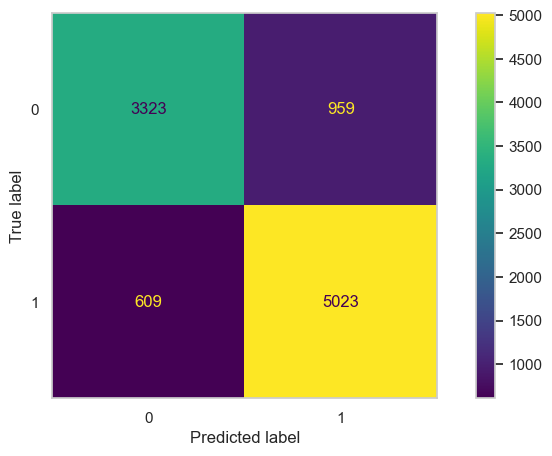

In [188]:
fig, ax = plt.subplots(figsize =(10,5))
ax.grid(False)
disp=ConfusionMatrixDisplay(confusion_matrix(y_train_fe, y_pred_train_ctbfe), display_labels=clf_ctbfe.classes_) 
disp.plot(ax=ax)
plt.show()

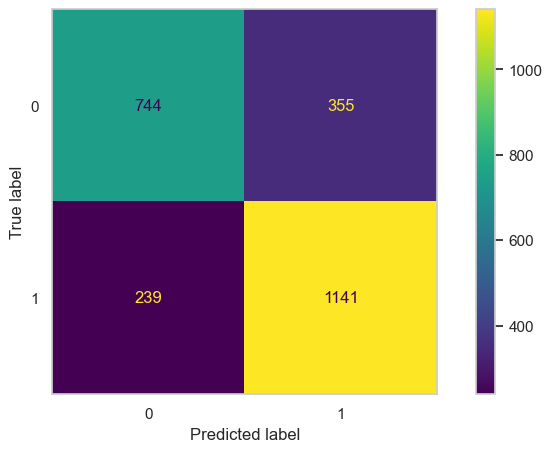

In [189]:
fig, ax = plt.subplots(figsize =(10,5))
ax.grid(False)
disp=ConfusionMatrixDisplay(confusion_matrix(y_test_fe, y_pred_test_ctbfe), display_labels=clf_ctbfe.classes_)
disp.plot(ax=ax)
plt.show()

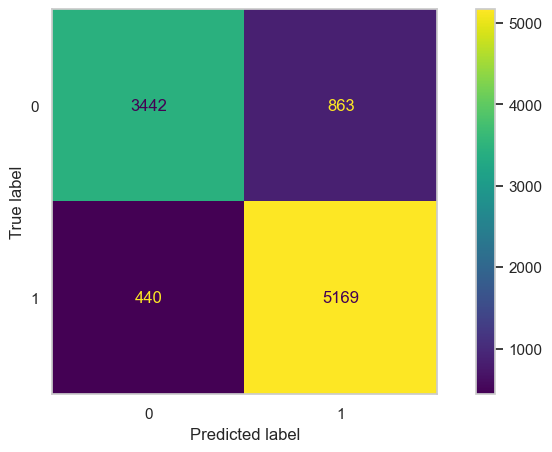

In [190]:
fig, ax = plt.subplots(figsize =(10,5))
ax.grid(False)
disp=ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train_stack), display_labels=clf_stack.classes_) 
disp.plot(ax=ax)
plt.show()

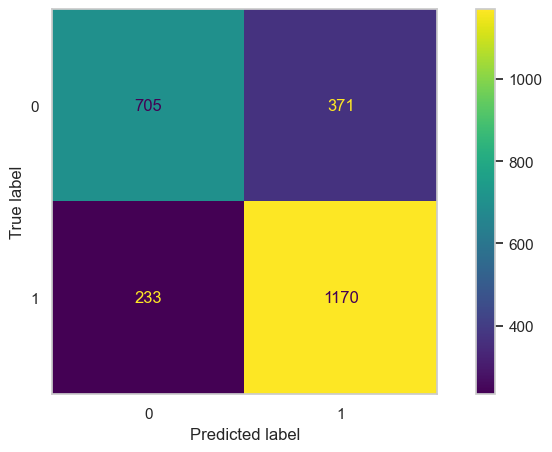

In [191]:
fig, ax = plt.subplots(figsize =(10,5))
ax.grid(False)
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_stack), display_labels=clf_stack.classes_) 
disp.plot(ax=ax)
plt.show()

In [192]:
'''roc_curve(
    y_true,
    y_score, # the probability score
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)'''

fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_stack)# The confidence score for a sample is proportional to the signeddistance of that sample to the hyperplane.
roc_auc = auc(fpr, tpr)
#display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                  estimator_name='Catboost')
#display.plot()
#plt.title('ROC AUC Curve')
#plt.show()
fig = px.area(
    x=fpr, y=tpr,
    title=f'Train ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)


In [193]:
'''roc_curve(
    y_true,
    y_score, # the probability score
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)'''

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_stack)# The confidence score for a sample is proportional to the signeddistance of that sample to the hyperplane.
roc_auc = auc(fpr, tpr)
#display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                  estimator_name='Catboost')
#display.plot()
#plt.title('ROC AUC Curve')
#plt.show()

fig = px.area(
    x=fpr, y=tpr,
    title=f'Test ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)



In [194]:
from pycaret.classification import *

In [195]:
# creating training dataset
dataset = df.sample(frac=0.90, random_state=1)
# test data
dataset_unseen = df.drop(dataset.index).reset_index(drop=True)

In [196]:
pyc_model = setup(data=dataset, target='target' , session_id=201)

In [197]:
#!pip install numba==0.56.3

In [198]:
compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [199]:
catboost = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [200]:
catboost.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 201,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.024776

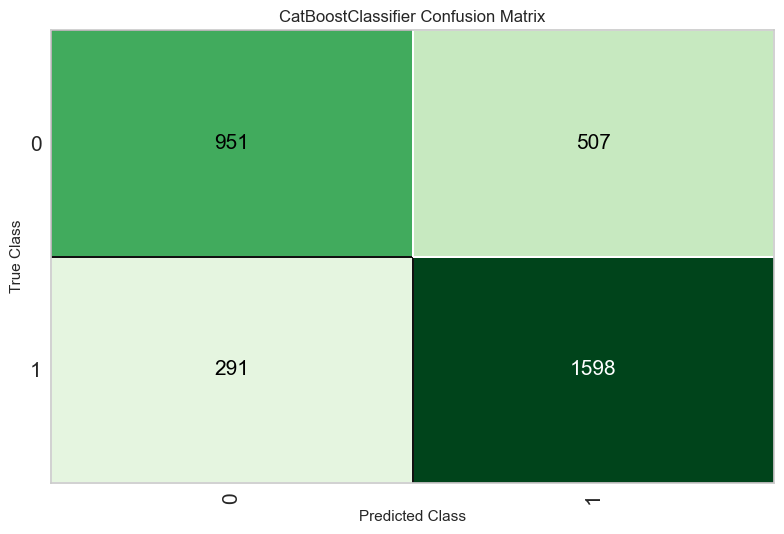

In [201]:
plot_model(catboost, plot='confusion_matrix')

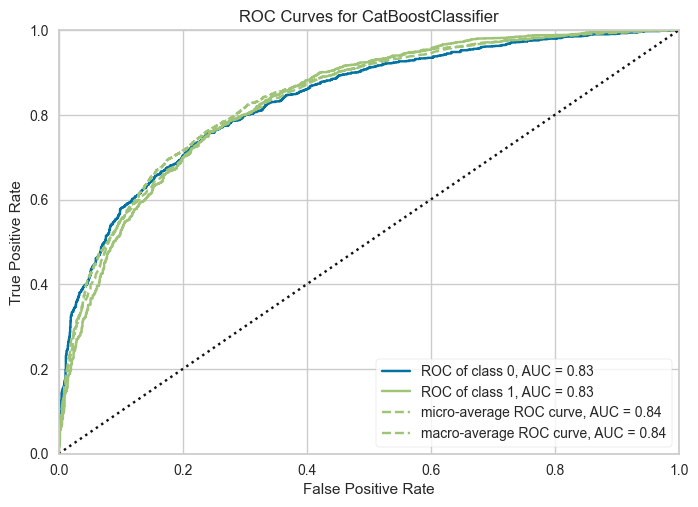

In [202]:
plot_model(catboost, plot='auc')

In [203]:
predict_model(catboost)

destination  passanger weather  temperature                 coupon expiration  gender age    maritalStatus  has_children  ... CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ25min        occupation_class to_Coupon  target prediction_label  prediction_score
8677   No Urgent Place  Friend(s)   Sunny           55  Carry out & Take away         1d    Male  26           Single             0  ...         1~3     less1                  1~3            less1                 0       Medium_Acceptance         1       1                1            0.8152
10150             Home      Alone   Sunny           80  Carry out & Take away         1d    Male  31  Married partner             0  ...       never       1~3                  1~3              1~3                 0         High_Acceptance         0       1                1            0.9817
3647   No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h  Female  31  Married partner             1  ...         1~3       1~3                  1~3            less1                 0   Medium_Low_Acceptance         0       1                1            0.8411
7103              Work      Alone   Rainy           55      Restaurant(20-50)         1d    Male  26           Single             0  ...       less1       gt8                  4~8            less1                 1  Medium_High_Acceptance         2       0                0            0.6517
4941   No Urgent Place  Friend(s)   Sunny           80           Coffee House         2h    Male  31           Single             0  ...       never       4~8                  1~3            less1                 0  Medium_High_Acceptance         1       0                0            0.7807
...                ...        ...     ...          ...                    ...        ...     ...  ..              ...           ...  ...         ...       ...                  ...              ...               ...                     ...       ...     ...              ...               ...
677    No Urgent Place      Alone   Sunny           55        Restaurant(<20)         1d    Male  36  Married partner             1  ...         1~3       4~8                  1~3              1~3                 0       Medium_Acceptance         0       1                1            0.9254
6762   No Urgent Place    Partner   Rainy           55  Carry out & Take away         1d  Female  31  Married partner             0  ...       less1       gt8                  4~8              1~3                 0          Low_Acceptance         0       1                1            0.8108
8704   No Urgent Place    Partner   Rainy           55        Restaurant(<20)         2h    Male  31  Married partner             0  ...         4~8     less1                  4~8            less1                 0       Medium_Acceptance         1       0                0            0.6533
9715   No Urgent Place      Alone   Snowy           30                    Bar         1d  Female  46           Single             0  ...         1~3       gt8                  4~8              1~3                 0  Medium_High_Acceptance         0       1                0            0.6650
10183             Work      Alone   Sunny           80           Coffee House         1d    Male  36  Married partner             1  ...       less1       4~8                  1~3            less1                 0       Medium_Acceptance         0       1                1            0.7981

[3347 rows x 23 columns]

In [204]:
unseen_predictions = predict_model(catboost, data= dataset_unseen)


__Observation:__
* we are having having train and test accuracy with Catboost model with manual as well as autoML Pycaret method
* With Manual , we see catboost has highest train accuracy of 85.9% and test accuracy of 76.4%
* with Pycaret , we see that catboost, we are getting train accuracy 76% and test accuracy 77.%
